In [207]:
import numpy as np
import pandas
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy import stats
import scipy.io as sio
import biosppy 
from statsmodels.tsa.stattools import adfuller
from scipy.ndimage import shift
import scipy.signal as signal

In [208]:
df = pandas.read_csv('EMG-data.csv')
df

,time,channel1,channel2,channel3,channel4,channel5,channel6,channel7,channel8,class,label
0,1,0.00001,-0.00002,-0.00001,-0.00003,0.00000,-0.00001,0.00000,-0.00001,0,1
1,5,0.00001,-0.00002,-0.00001,-0.00003,0.00000,-0.00001,0.00000,-0.00001,0,1
2,6,-0.00001,0.00001,0.00002,0.00000,0.00001,-0.00002,-0.00001,0.00001,0,1
3,7,-0.00001,0.00001,0.00002,0.00000,0.00001,-0.00002,-0.00001,0.00001,0,1
4,8,-0.00001,0.00001,0.00002,0.00000,0.00001,-0.00002,-0.00001,0.00001,0,1
...,...,...,...,...,...,...,...,...,...,...,...
4237902,50962,0.00001,-0.00001,-0.00002,-0.00004,-0.00012,0.00000,0.00002,0.00002,0,36
4237903,50963,0.00001,-0.00001,-0.00002,-0.00004,-0.00012,0.00000,0.00002,0.00002,0,36
4237904,50964,0.00001,-0.00001,-0.00002,-0.00004,-0.00012,0.00000,0.00002,0.00002,0,36
4237905,50965,0.00001,-0.00001,-0.00002,-0.00004,-0.00012,0.00000,0.00002,0.00002,0,36


PUNTO b

In [209]:
Ts=1/1000

<Figure size 640x480 with 0 Axes>

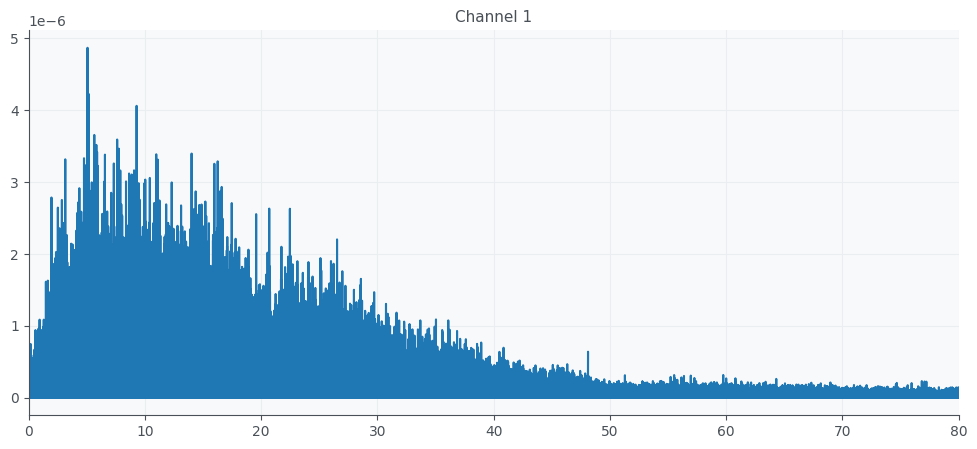

<Figure size 640x480 with 0 Axes>

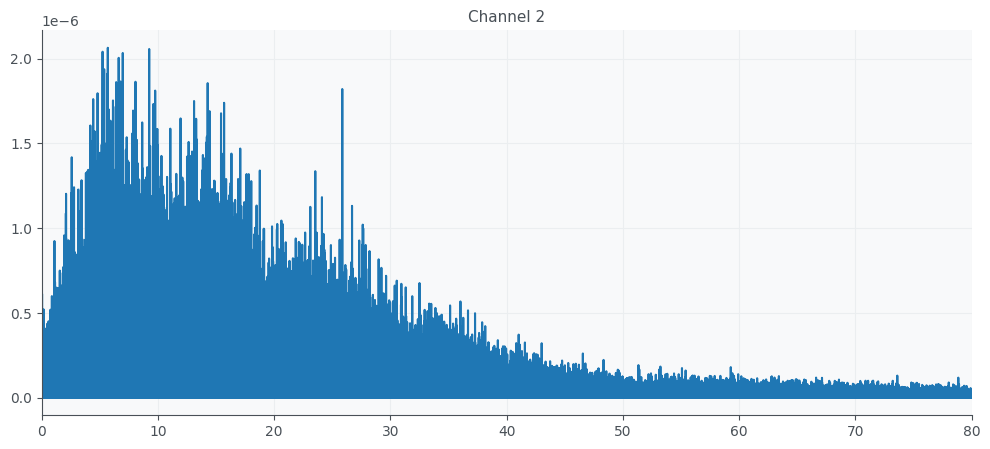

<Figure size 640x480 with 0 Axes>

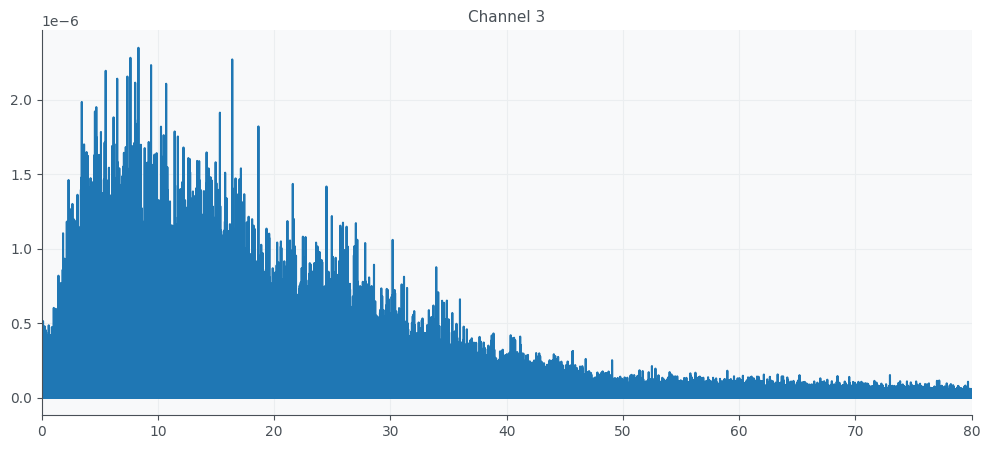

<Figure size 640x480 with 0 Axes>

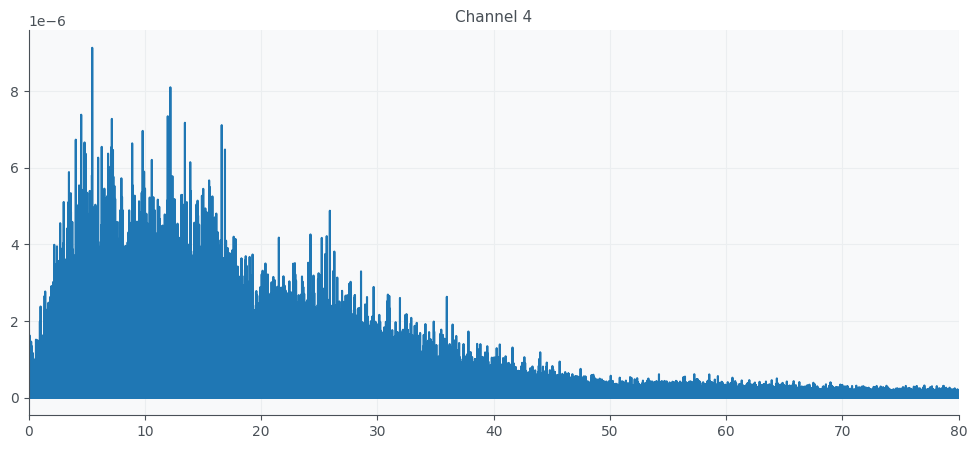

<Figure size 640x480 with 0 Axes>

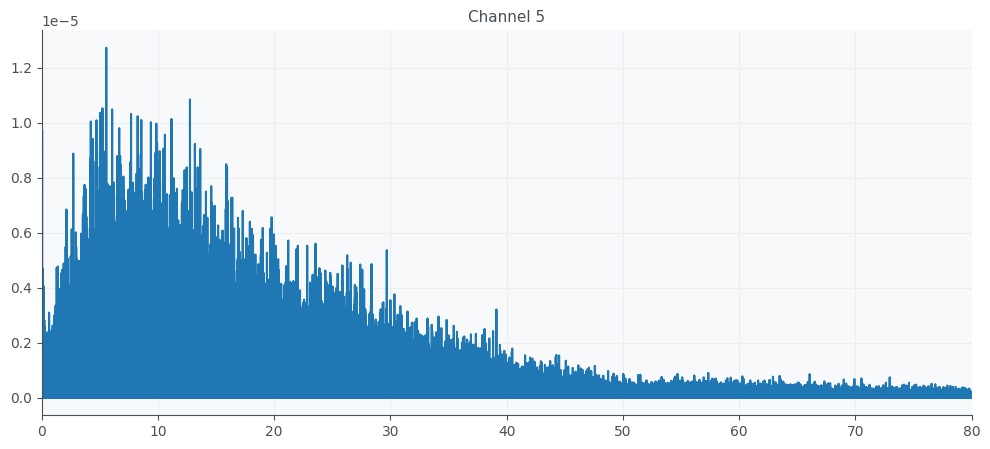

<Figure size 640x480 with 0 Axes>

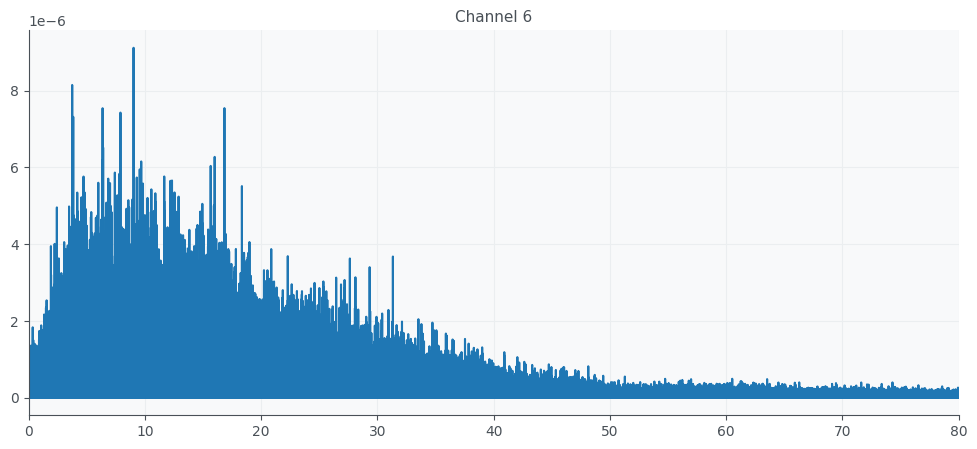

<Figure size 640x480 with 0 Axes>

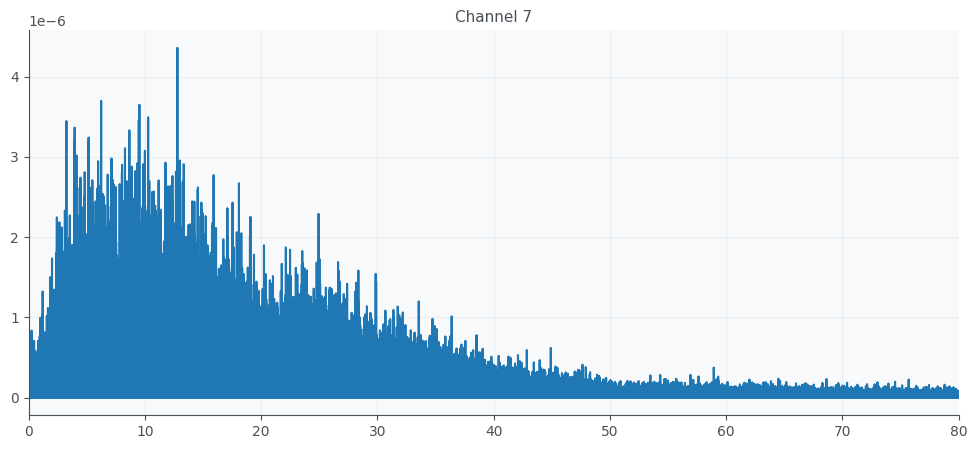

<Figure size 640x480 with 0 Axes>

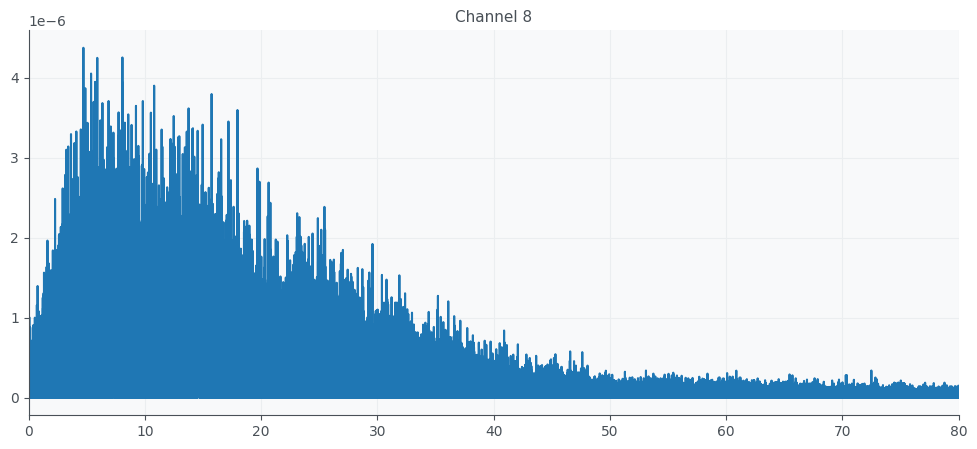

In [210]:
for i in range(1,9):
    n=len(df["time"])
    #print(n)
    fhat=np.fft.fft(df["channel"+str(i)],n)
    #print(fhat)
    PSD=((np.absolute(fhat))**2)/n
    #print(PSD)
    freq=(1/(Ts*n))*np.arange(n)
    #print(freq)
    L=np.arange(1,np.floor(n/2),dtype="int")
    #print(L)
    plt.figure(i)
    plt.figure(figsize=(12,5))
    plt.title("Channel "+str(i))
    plt.plot(freq[L],PSD[L])
    plt.xlim(0,80)
    plt.show()

Considerando que la señal a tratar es multicanal , es importante mantener la coherencia temporal y la relación entre los diferentes canales de la señal. Los filtros FIR, al no tener realimentación, pueden ser más adecuados para preservar esta coherencia entre canales en comparación con los filtros IIR, que pueden introducir distorsiones adicionales.

In [211]:
Fs=1000
order = 70 # orden filtro
nyquist = Fs/2 # frecuencia de nyquist
wn1 = 60/nyquist #frecuencia de corte normalizada respecto nyquist para filtro pasa bajas.

# FILTROS FIR 

# Filtro pasa bajas 
lowpass =signal.firwin(order+1,wn1, pass_zero ='lowpass',window='hamming')

In [212]:
lowpass

array([ 4.28344817e-04,  1.90880016e-04, -1.05822692e-04, -4.63555816e-04,
       -8.66399981e-04, -1.26902338e-03, -1.59222722e-03, -1.72936803e-03,
       -1.56483638e-03, -1.00263936e-03,  1.18631380e-18,  1.40150131e-03,
        3.05570762e-03,  4.71023279e-03,  6.02833685e-03,  6.63508660e-03,
        6.18353500e-03,  4.43175495e-03,  1.31780941e-03, -2.98198314e-03,
       -8.02524970e-03, -1.31163954e-02, -1.73643171e-02, -1.97818844e-02,
       -1.94164781e-02, -1.54944024e-02, -7.55787165e-03,  4.42756761e-03,
        2.00145167e-02,  3.82772394e-02,  5.78815865e-02,  7.72157334e-02,
        9.45665477e-02,  1.08318798e-01,  1.17150107e-01,  1.20194337e-01,
        1.17150107e-01,  1.08318798e-01,  9.45665477e-02,  7.72157334e-02,
        5.78815865e-02,  3.82772394e-02,  2.00145167e-02,  4.42756761e-03,
       -7.55787165e-03, -1.54944024e-02, -1.94164781e-02, -1.97818844e-02,
       -1.73643171e-02, -1.31163954e-02, -8.02524970e-03, -2.98198314e-03,
        1.31780941e-03,  

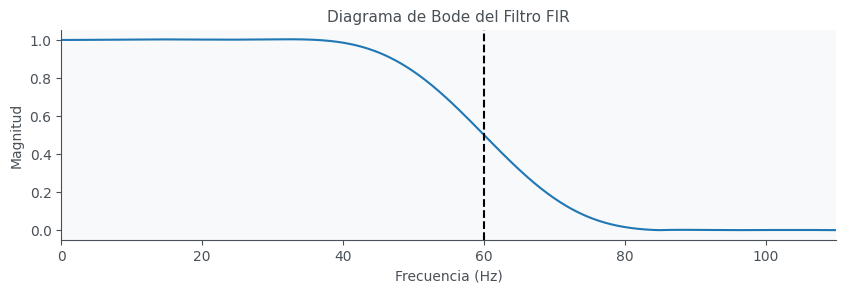

In [213]:
# Rectificación de la implementación del filtro

# Respuesta en frecuencia del filtro
w, h = signal.freqz(lowpass, worN=8000)

# Frecuencias en Hz
frequencies = w * nyquist / np.pi

# Diagrama de Bode
plt.figure(figsize=(10, 6))

# Magnitud en escala lineal
plt.subplot(2, 1, 1)
plt.plot(frequencies, np.abs(h))
plt.axvline(60,color="k",linestyle="--")
plt.xlim(0,110)
plt.title('Diagrama de Bode del Filtro FIR')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Magnitud')
plt.grid()

PUNTO c

In [214]:
df_filtrado=df.copy()
df_filtrado

,time,channel1,channel2,channel3,channel4,channel5,channel6,channel7,channel8,class,label
0,1,0.00001,-0.00002,-0.00001,-0.00003,0.00000,-0.00001,0.00000,-0.00001,0,1
1,5,0.00001,-0.00002,-0.00001,-0.00003,0.00000,-0.00001,0.00000,-0.00001,0,1
2,6,-0.00001,0.00001,0.00002,0.00000,0.00001,-0.00002,-0.00001,0.00001,0,1
3,7,-0.00001,0.00001,0.00002,0.00000,0.00001,-0.00002,-0.00001,0.00001,0,1
4,8,-0.00001,0.00001,0.00002,0.00000,0.00001,-0.00002,-0.00001,0.00001,0,1
...,...,...,...,...,...,...,...,...,...,...,...
4237902,50962,0.00001,-0.00001,-0.00002,-0.00004,-0.00012,0.00000,0.00002,0.00002,0,36
4237903,50963,0.00001,-0.00001,-0.00002,-0.00004,-0.00012,0.00000,0.00002,0.00002,0,36
4237904,50964,0.00001,-0.00001,-0.00002,-0.00004,-0.00012,0.00000,0.00002,0.00002,0,36
4237905,50965,0.00001,-0.00001,-0.00002,-0.00004,-0.00012,0.00000,0.00002,0.00002,0,36


In [215]:
for i in range(1,9):
    señal_postFIR = signal.filtfilt (b=lowpass, a=1, x=df["channel"+str(i)]) # aplicación del filtro pasa
    df_filtrado["channel"+str(i)]=señal_postFIR

In [216]:
df_filtrado

,time,channel1,channel2,channel3,channel4,channel5,channel6,channel7,channel8,class,label
0,1,0.000010,-2.000000e-05,-1.000000e-05,-0.000030,1.863422e-22,-1.000000e-05,2.949946e-23,-1.000000e-05,0,1
1,5,0.000006,-1.294774e-05,-7.003197e-07,-0.000022,3.733692e-06,-1.134966e-05,-1.685433e-06,-4.615562e-06,0,1
2,6,0.000001,-6.242821e-06,7.986694e-06,-0.000014,7.176748e-06,-1.275248e-05,-3.333566e-06,4.439670e-07,0,1
3,7,-0.000002,-2.069096e-07,1.549053e-05,-0.000008,1.005983e-05,-1.425216e-05,-4.911140e-06,4.878844e-06,0,1
4,8,-0.000006,4.887646e-06,2.132213e-05,-0.000002,1.215469e-05,-1.587422e-05,-6.392401e-06,8.437569e-06,0,1
...,...,...,...,...,...,...,...,...,...,...,...
4237902,50962,0.000010,-1.173276e-05,-2.115485e-05,-0.000042,-1.298414e-04,-2.299489e-06,2.492137e-05,1.735396e-05,0,36
4237903,50963,0.000010,-1.138239e-05,-2.093421e-05,-0.000042,-1.273505e-04,-1.474666e-06,2.382267e-05,1.762896e-05,0,36
4237904,50964,0.000010,-1.095846e-05,-2.065445e-05,-0.000041,-1.248420e-04,-8.395048e-07,2.259758e-05,1.822579e-05,0,36
4237905,50965,0.000010,-1.048973e-05,-2.033655e-05,-0.000041,-1.223941e-04,-3.714418e-07,2.131059e-05,1.905295e-05,0,36


<Figure size 640x480 with 0 Axes>

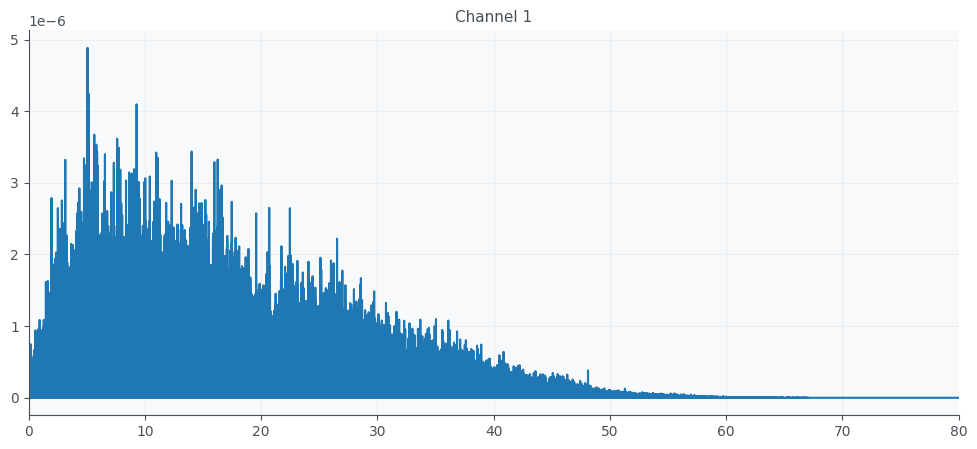

<Figure size 640x480 with 0 Axes>

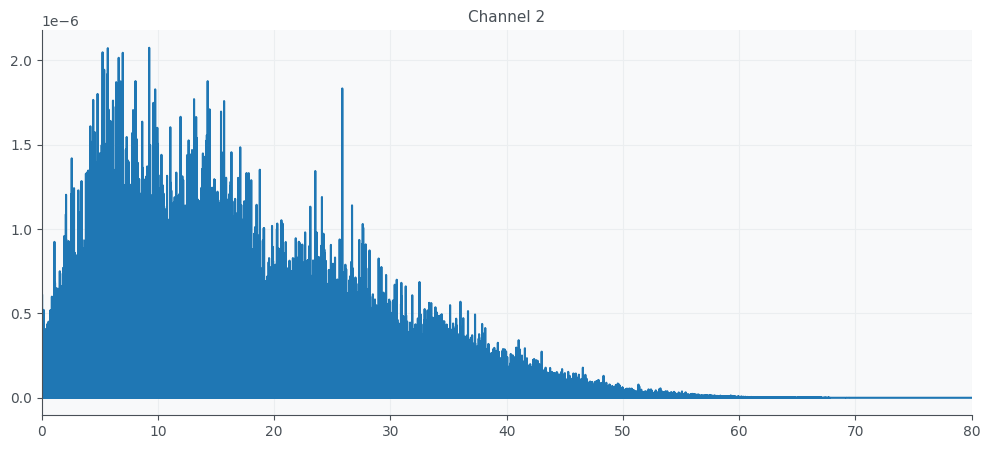

<Figure size 640x480 with 0 Axes>

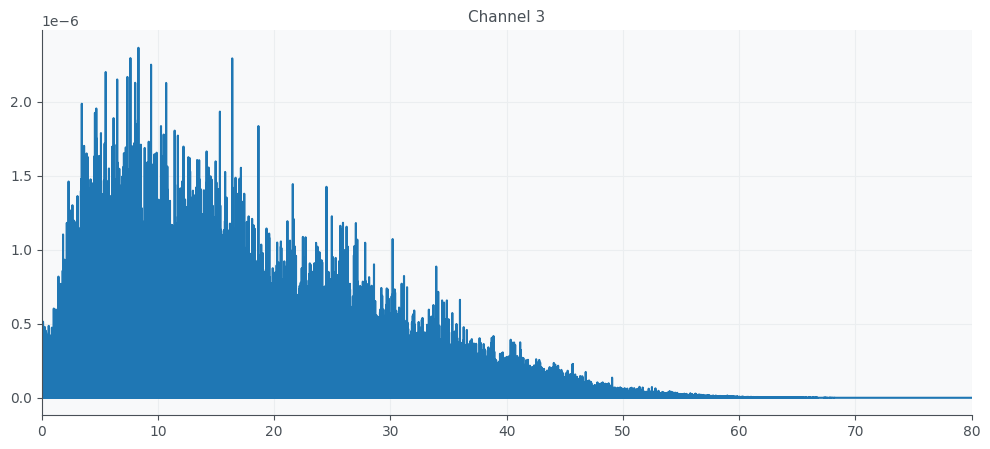

<Figure size 640x480 with 0 Axes>

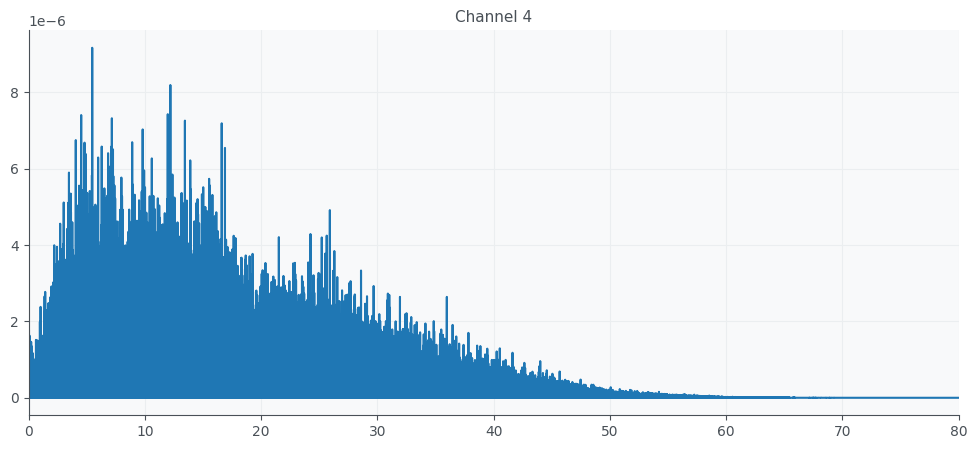

<Figure size 640x480 with 0 Axes>

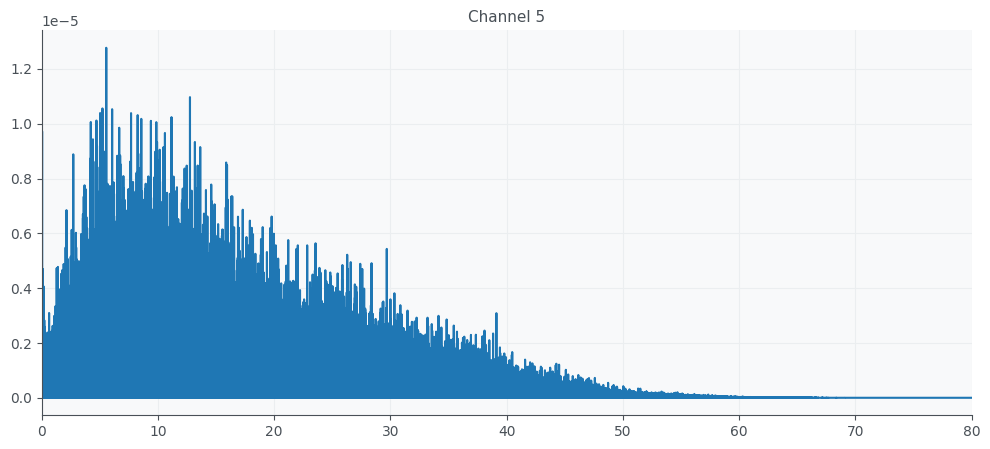

<Figure size 640x480 with 0 Axes>

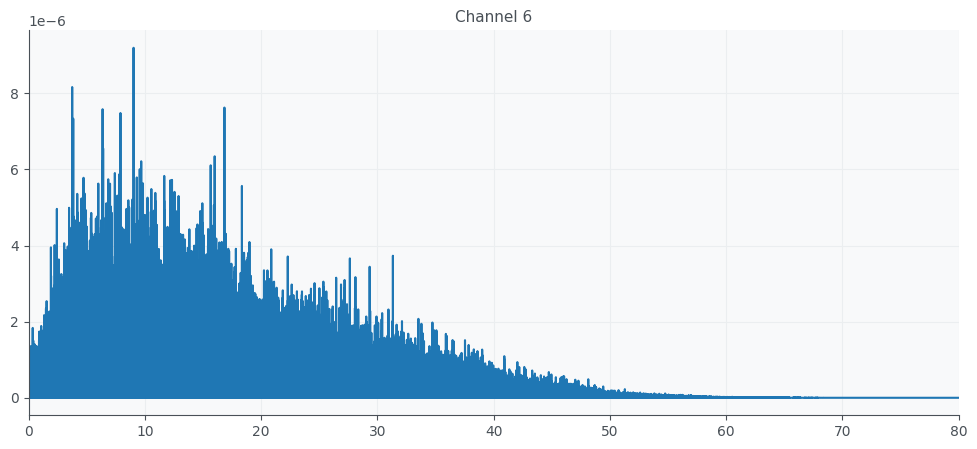

<Figure size 640x480 with 0 Axes>

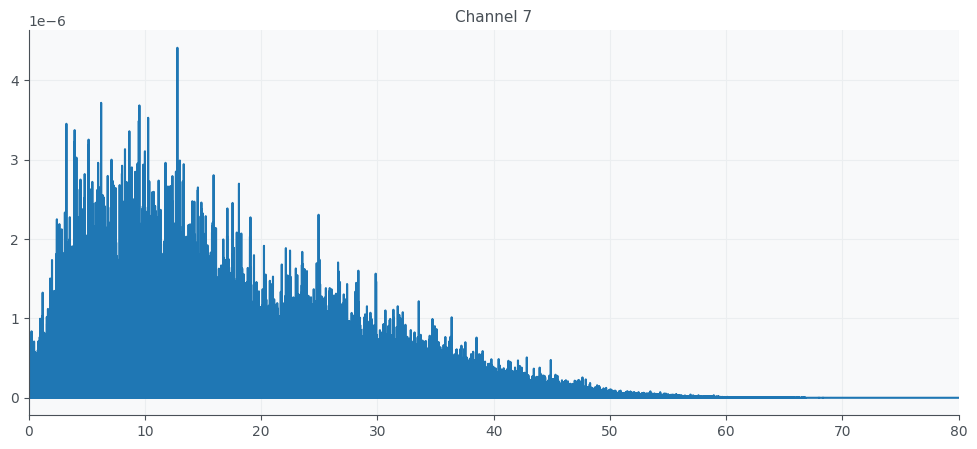

<Figure size 640x480 with 0 Axes>

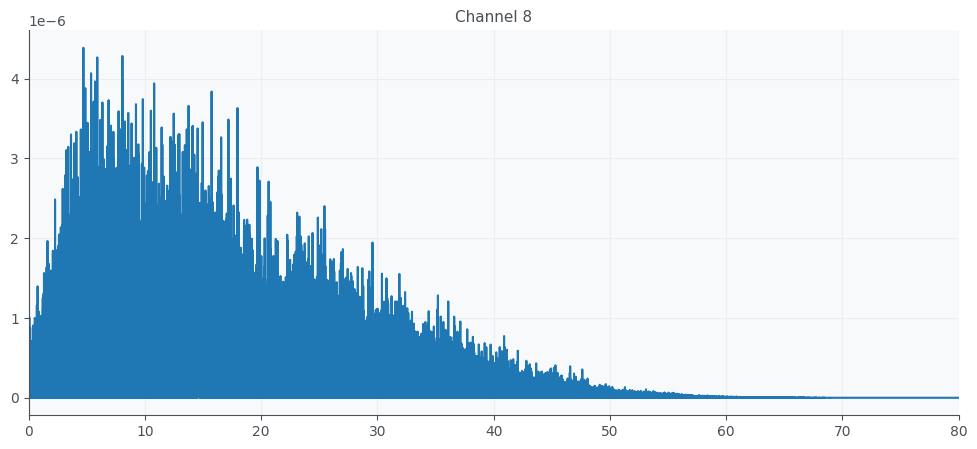

In [217]:
for i in range(1,9):
    n=len(df_filtrado["time"])
    #print(n)
    fhat=np.fft.fft(df_filtrado["channel"+str(i)],n)
    #print(fhat)
    PSD=((np.absolute(fhat))**2)/n
    #print(PSD)
    freq=(1/(Ts*n))*np.arange(n)
    #print(freq)
    L=np.arange(1,np.floor(n/2),dtype="int")
    #print(L)
    plt.figure(i)
    plt.figure(figsize=(12,5))
    plt.title("Channel "+str(i))
    plt.plot(freq[L],PSD[L])
    plt.xlim(0,80)
    plt.show()

In [218]:
def TKEO(señal):
      
      # Calcula el atraso y el adelanto de la señal utilizando la función shift
     atraso=shift(señal,1,cval=0) # Atraso un paso
     adelanto=shift(señal,-1,cval=0) # Adelanto un paso
     
     # Calcula el TKEO de la señal utilizando la fórmula del operador
     return((señal**2)-atraso*adelanto)

In [219]:
def RMS(s):
  N=len(s) # Obtener la longitud de la señal
  return ((1/N)*sum(s**2))**0.5 # Calcular RMS utilizando la fórmula: sqrt((1/N) * sum(s^2))

def mean_absolute_value(s):
    N=len(s)
    return ((1/N)*sum(abs(s))) # Calcular el valor absoluto promedio utilizando la fórmula: (1/N) * sum(abs(s))

def mean_absolute_value_slope(signal):
     # Calcular la diferencia entre valores consecutivos en la señal
     # Calcular el valor absoluto promedio de las diferencias
    return np.mean(np.abs(np.diff(signal)))

def slope_sign_changes(signal):
    # Calcular la diferencia entre valores consecutivos en la señal
    # Calcular el signo de las diferencias consecutivas
    # Calcular el número de cambios en el signo de la pendiente
    return np.sum(np.diff(np.sign(np.diff(signal))) != 0)

def waveform_length(signal):
    # Calcular la suma de los valores absolutos de las diferencias
    return np.sum(np.abs(np.diff(signal)))

def zero_crossing(signal):
    # Calcular el número de cruces por cero contando los cambios de signo
    return np.sum(np.diff(np.sign(signal)) != 0)

In [220]:
# Se inicializa un diccionario vacío para almacenar las métricas
dic2 = {}

def punto6(dtf, sujeto,clas):
    # Se obtienen los nombres de los canales del DataFrame
    canales = dtf.columns.values[1:9]
    
    # Iterar sobre cada canal
    for i in range(canales.size):
        # Seleccionar el tiempo y la señal del canal para el sujeto especificado
        #tiempo = df.loc[df["label"] == sujeto, "time"]
        suj1 = dtf.loc[(dtf["label"]==sujeto) & (dtf["class"]==clas), canales[i]]
        if len(suj1)!=0:
            # Se aplica el operador TKEO a la señal
            suj1 = TKEO(suj1)

            # Se almacenan las métricas en el diccionario
        
            dic2["TKEO"] = 1
            dic2["clase gesto"]=clas
            dic2["RMS_C" + str(i + 1)] = RMS(suj1)
            dic2["var_C" + str(i + 1)] = np.var(suj1)
            dic2["mav_C" + str(i + 1)] = mean_absolute_value(suj1)
            dic2["mavs_C" + str(i + 1)] = mean_absolute_value_slope(suj1)
            dic2["ssc_C" + str(i + 1)] = slope_sign_changes(suj1)
            dic2["wl_C" + str(i + 1)] = waveform_length(suj1)
            dic2["zc_C" + str(i + 1)] = zero_crossing(suj1)
        else:
            dic2["TKEO"] = 1
            dic2["clase gesto"]=clas
            dic2["RMS_C" + str(i + 1)] = 0
            dic2["var_C" + str(i + 1)] = 0
            dic2["mav_C" + str(i + 1)] = 0
            dic2["mavs_C" + str(i + 1)] =0
            dic2["ssc_C" + str(i + 1)] = 0
            dic2["wl_C" + str(i + 1)] = 0
            dic2["zc_C" + str(i + 1)] = 0

# Se crea un DataFrame vacío para almacenar los resultados
output_FIR = pandas.DataFrame()

# Se itera sobre todos los sujetos
dic_index = {"sujetos": []}
for ii in range(1,8):
    for i in range(1, 37):
        # Se limpia el diccionario para cada sujeto
        dic2 = {}
        # Se calculan las métricas para el sujeto actual
        punto6(df_filtrado, i,ii)
        # Se crea un DataFrame a partir del diccionario y se concatena al DataFrame de salida
        df_dictionary = pandas.DataFrame([dic2])
        output_FIR = pandas.concat([output_FIR, df_dictionary], ignore_index=True)

    # Se crea un diccionario para los índices de los sujetos
    
    for i in range(1, 37):
        dic_index["sujetos"].append("sujeto" + str(i))

    output_FIR.index=(dic_index["sujetos"])

In [221]:
output_FIR

,TKEO,clase gesto,RMS_C1,var_C1,mav_C1,mavs_C1,ssc_C1,wl_C1,zc_C1,RMS_C2,...,ssc_C7,wl_C7,zc_C7,RMS_C8,var_C8,mav_C8,mavs_C8,ssc_C8,wl_C8,zc_C8
sujeto1,1,1,1.352855e-11,1.526210e-22,6.096666e-12,1.065116e-12,550,7.786000e-09,328,3.455990e-11,...,571,4.926779e-09,308,9.981598e-12,8.733255e-23,3.937454e-12,8.185256e-13,557,5.983422e-09,350
sujeto2,1,1,1.488473e-11,1.812167e-22,6.863891e-12,1.130917e-12,531,8.073614e-09,280,3.635917e-11,...,545,7.082580e-09,278,1.091257e-11,9.829623e-23,5.043715e-12,9.041879e-13,541,6.454998e-09,304
sujeto3,1,1,1.721583e-11,2.413657e-22,8.083695e-12,1.310906e-12,457,8.444857e-09,260,1.250909e-10,...,491,8.444622e-09,264,2.216730e-11,4.489634e-22,7.284457e-12,1.542700e-12,471,9.938072e-09,262
sujeto4,1,1,1.308155e-11,1.399285e-22,6.135516e-12,1.090793e-12,457,7.057429e-09,240,3.258068e-11,...,473,7.109543e-09,238,2.357372e-11,5.194743e-22,6.644831e-12,1.508780e-12,503,9.761808e-09,266
sujeto5,1,1,8.496206e-12,5.746387e-23,4.289183e-12,7.190269e-13,483,4.677270e-09,304,2.390548e-11,...,493,4.142383e-09,286,7.046723e-12,4.127285e-23,3.394449e-12,6.063424e-13,505,3.944257e-09,304
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
sujeto32,1,7,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0,0.000000e+00,0,0.000000e+00,...,0,0.000000e+00,0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0,0.000000e+00,0
sujeto33,1,7,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0,0.000000e+00,0,0.000000e+00,...,0,0.000000e+00,0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0,0.000000e+00,0
sujeto34,1,7,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0,0.000000e+00,0,0.000000e+00,...,0,0.000000e+00,0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0,0.000000e+00,0
sujeto35,1,7,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0,0.000000e+00,0,0.000000e+00,...,0,0.000000e+00,0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0,0.000000e+00,0


In [222]:
# Se crea un DataFrame vacío para almacenar los resultados
dic2={}
output = pandas.DataFrame()

# Se itera sobre todos los sujetos
dic_index = {"sujetos": []}
for ii in range(1,8):
    for i in range(1, 37):
        # Se limpia el diccionario para cada sujeto
        dic2 = {}
        # Se calculan las métricas para el sujeto actual
        punto6(df, i,ii)
        # Se crea un DataFrame a partir del diccionario y se concatena al DataFrame de salida
        df_dictionary = pandas.DataFrame([dic2])
        output = pandas.concat([output, df_dictionary], ignore_index=True)

    # Se crea un diccionario para los índices de los sujetos
    
    for i in range(1, 37):
        dic_index["sujetos"].append("sujeto" + str(i))

    output.index=(dic_index["sujetos"])

In [223]:
output

,TKEO,clase gesto,RMS_C1,var_C1,mav_C1,mavs_C1,ssc_C1,wl_C1,zc_C1,RMS_C2,...,ssc_C7,wl_C7,zc_C7,RMS_C8,var_C8,mav_C8,mavs_C8,ssc_C8,wl_C8,zc_C8
sujeto1,1,1,1.935847e-10,3.636848e-20,4.133497e-11,6.872777e-11,4948,5.024000e-07,2082,6.141161e-10,...,5048,3.374000e-07,2268,1.348566e-10,1.761071e-20,3.088497e-11,5.188782e-11,5105,3.793000e-07,2171
sujeto2,1,1,2.414243e-10,5.638114e-20,5.204482e-11,8.181818e-11,5070,5.841000e-07,2186,5.970000e-10,...,5123,6.281000e-07,2140,1.679961e-10,2.725159e-20,3.906162e-11,6.269786e-11,5154,4.476000e-07,2291
sujeto3,1,1,3.157194e-10,9.669566e-20,6.573025e-11,1.041292e-10,4503,6.708000e-07,1842,1.467134e-09,...,4532,4.147000e-07,1946,2.313508e-10,5.129843e-20,5.989446e-11,9.531201e-11,4593,6.140000e-07,1920
sujeto4,1,1,2.091147e-10,4.219670e-20,4.844692e-11,7.442040e-11,4653,4.815000e-07,1961,5.085576e-10,...,4661,5.100000e-07,1965,1.945042e-10,3.623853e-20,4.887962e-11,7.472952e-11,4696,4.835000e-07,1951
sujeto5,1,1,2.513658e-10,6.218997e-20,4.011682e-11,6.711760e-11,4442,4.366000e-07,1955,4.285446e-10,...,4393,2.814000e-07,1960,1.236113e-10,1.478508e-20,2.943437e-11,4.908532e-11,4542,3.193000e-07,1970
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
sujeto32,1,7,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0,0.000000e+00,0,0.000000e+00,...,0,0.000000e+00,0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0,0.000000e+00,0
sujeto33,1,7,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0,0.000000e+00,0,0.000000e+00,...,0,0.000000e+00,0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0,0.000000e+00,0
sujeto34,1,7,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0,0.000000e+00,0,0.000000e+00,...,0,0.000000e+00,0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0,0.000000e+00,0
sujeto35,1,7,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0,0.000000e+00,0,0.000000e+00,...,0,0.000000e+00,0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0,0.000000e+00,0


In [224]:
output.loc[output.index[0],"RMS_C1"]

sujeto1    1.935847e-10
sujeto1    5.126579e-08
sujeto1    3.650802e-08
sujeto1    2.328481e-09
sujeto1    8.954271e-09
sujeto1    4.394666e-08
sujeto1    0.000000e+00
Name: RMS_C1, dtype: float64

In [225]:
output.loc[output["clase gesto"]==1,"RMS_C2"]

sujeto1     6.141161e-10
sujeto2     5.970000e-10
sujeto3     1.467134e-09
sujeto4     5.085576e-10
sujeto5     4.285446e-10
sujeto6     5.826452e-10
sujeto7     5.844022e-10
sujeto8     2.714827e-10
sujeto9     1.081449e-09
sujeto10    8.180220e-10
sujeto11    2.650934e-10
sujeto12    1.671813e-10
sujeto13    4.759268e-10
sujeto14    3.506302e-10
sujeto15    2.132452e-10
sujeto16    7.385796e-10
sujeto17    1.675943e-09
sujeto18    3.106321e-10
sujeto19    1.748976e-09
sujeto20    8.071011e-10
sujeto21    1.200517e-09
sujeto22    2.077733e-10
sujeto23    1.417047e-10
sujeto24    3.903078e-10
sujeto25    6.136206e-10
sujeto26    4.389785e-10
sujeto27    9.413859e-09
sujeto28    9.047255e-10
sujeto29    3.162153e-10
sujeto30    9.957453e-10
sujeto31    4.374840e-10
sujeto32    3.780639e-10
sujeto33    4.091719e-10
sujeto34    7.138007e-10
sujeto35    2.344842e-10
sujeto36    4.190055e-10
Name: RMS_C2, dtype: float64

In [226]:
output.describe()

,TKEO,clase gesto,RMS_C1,var_C1,mav_C1,mavs_C1,ssc_C1,wl_C1,zc_C1,RMS_C2,...,ssc_C7,wl_C7,zc_C7,RMS_C8,var_C8,mav_C8,mavs_C8,ssc_C8,wl_C8,zc_C8
count,252.0,252.00000,2.520000e+02,2.520000e+02,2.520000e+02,2.520000e+02,252.000000,2.520000e+02,252.000000,2.520000e+02,...,252.000000,2.520000e+02,252.000000,2.520000e+02,2.520000e+02,2.520000e+02,2.520000e+02,252.000000,2.520000e+02,252.000000
mean,1.0,4.00000,3.245643e-08,3.778722e-15,7.181080e-09,1.035960e-08,4423.281746,7.006764e-05,1689.031746,1.740737e-08,...,4437.579365,5.929601e-05,1693.043651,3.398928e-08,4.056177e-15,7.745996e-09,1.126459e-08,4429.595238,7.794004e-05,1702.261905
std,0.0,2.00398,5.403976e-08,1.284512e-14,1.376122e-08,1.941891e-08,1859.463737,1.278344e-04,715.384102,3.779211e-08,...,1864.823745,1.178245e-04,714.233204,5.571251e-08,1.208542e-14,1.394471e-08,1.997253e-08,1863.787369,1.412288e-04,718.698677
min,1.0,1.00000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,...,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000
25%,1.0,2.00000,3.194602e-10,9.903583e-20,6.586039e-11,1.032692e-10,4527.500000,7.096500e-07,1692.000000,7.111175e-10,...,4519.750000,6.860750e-07,1705.500000,2.299370e-10,5.075921e-20,5.228082e-11,8.199325e-11,4539.750000,6.074250e-07,1729.250000
50%,1.0,4.00000,8.372651e-09,6.910689e-17,1.410128e-09,2.107759e-09,4922.500000,1.539570e-05,1887.500000,4.715541e-09,...,4948.000000,1.661750e-05,1892.000000,8.665259e-09,7.333989e-17,1.602810e-09,2.292878e-09,4908.000000,1.557965e-05,1887.000000
75%,1.0,6.00000,3.915287e-08,1.499039e-15,7.145781e-09,1.071119e-08,5330.000000,8.217018e-05,2013.750000,1.402726e-08,...,5322.750000,6.126848e-05,2025.500000,4.212186e-08,1.714841e-15,8.995603e-09,1.327237e-08,5342.750000,9.118803e-05,2029.250000
max,1.0,7.00000,4.090566e-07,1.564240e-13,1.181874e-07,1.623912e-07,8587.000000,1.042064e-03,3296.000000,2.899921e-07,...,8702.000000,7.814882e-04,3326.000000,3.682611e-07,1.274325e-13,1.035696e-07,1.435086e-07,8539.000000,1.028383e-03,3383.000000


In [227]:
output_FIR.describe()

,TKEO,clase gesto,RMS_C1,var_C1,mav_C1,mavs_C1,ssc_C1,wl_C1,zc_C1,RMS_C2,...,ssc_C7,wl_C7,zc_C7,RMS_C8,var_C8,mav_C8,mavs_C8,ssc_C8,wl_C8,zc_C8
count,252.0,252.00000,2.520000e+02,2.520000e+02,2.520000e+02,2.520000e+02,252.000000,2.520000e+02,252.000000,2.520000e+02,...,252.000000,2.520000e+02,252.000000,2.520000e+02,2.520000e+02,2.520000e+02,2.520000e+02,252.000000,2.520000e+02,252.000000
mean,1.0,4.00000,2.564582e-09,2.401376e-17,9.627414e-10,1.554568e-10,418.119048,1.045362e-06,240.174603,1.292732e-09,...,418.416667,9.116864e-07,241.285714,2.724300e-09,2.396209e-17,1.034711e-09,1.645186e-10,419.448413,1.138715e-06,242.888889
std,0.0,2.00398,4.632780e-09,8.866488e-17,1.857887e-09,3.071324e-10,176.863200,1.999587e-06,103.319261,2.844783e-09,...,177.508624,1.925263e-06,105.168418,4.536467e-09,7.542400e-17,1.830964e-09,2.824067e-10,177.521744,2.010515e-06,105.625832
min,1.0,1.00000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,...,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000
25%,1.0,2.00000,2.387412e-11,4.994704e-22,7.666486e-12,1.444734e-12,417.000000,9.528249e-09,236.000000,5.012085e-11,...,416.500000,1.158289e-08,230.000000,2.322462e-11,4.541993e-22,7.206013e-12,1.534220e-12,419.750000,9.985042e-09,235.500000
50%,1.0,4.00000,6.170240e-10,3.424886e-19,1.869641e-10,3.063638e-11,460.000000,2.027461e-07,264.000000,3.368924e-10,...,462.500000,2.428319e-07,266.000000,5.856397e-10,3.051901e-19,1.964368e-10,3.191404e-11,464.500000,2.206181e-07,266.000000
75%,1.0,6.00000,2.499294e-09,5.603855e-18,9.657202e-10,1.412470e-10,507.000000,1.013473e-06,294.000000,9.887613e-10,...,507.000000,9.189338e-07,294.000000,3.382192e-09,9.714458e-18,1.175906e-09,1.954996e-10,507.000000,1.384736e-06,298.000000
max,1.0,7.00000,3.434871e-08,9.277687e-16,1.666172e-08,2.616204e-09,777.000000,1.678818e-05,468.000000,1.775666e-08,...,777.000000,1.457356e-05,506.000000,2.998235e-08,8.772654e-16,1.267787e-08,1.774659e-09,777.000000,1.271721e-05,474.000000


In [228]:
columT = output.columns.values
columT

array(['TKEO', 'clase gesto', 'RMS_C1', 'var_C1', 'mav_C1', 'mavs_C1',
       'ssc_C1', 'wl_C1', 'zc_C1', 'RMS_C2', 'var_C2', 'mav_C2',
       'mavs_C2', 'ssc_C2', 'wl_C2', 'zc_C2', 'RMS_C3', 'var_C3',
       'mav_C3', 'mavs_C3', 'ssc_C3', 'wl_C3', 'zc_C3', 'RMS_C4',
       'var_C4', 'mav_C4', 'mavs_C4', 'ssc_C4', 'wl_C4', 'zc_C4',
       'RMS_C5', 'var_C5', 'mav_C5', 'mavs_C5', 'ssc_C5', 'wl_C5',
       'zc_C5', 'RMS_C6', 'var_C6', 'mav_C6', 'mavs_C6', 'ssc_C6',
       'wl_C6', 'zc_C6', 'RMS_C7', 'var_C7', 'mav_C7', 'mavs_C7',
       'ssc_C7', 'wl_C7', 'zc_C7', 'RMS_C8', 'var_C8', 'mav_C8',
       'mavs_C8', 'ssc_C8', 'wl_C8', 'zc_C8'], dtype=object)

In [229]:
from sklearn.preprocessing import MinMaxScaler


scaler = MinMaxScaler()

# Normalizar las columnas relevantes en ambos DataFrames
for col in columT[2:9]:
    output[col] = scaler.fit_transform(output[[col]])
    output_FIR[col] = scaler.fit_transform(output_FIR[[col]])

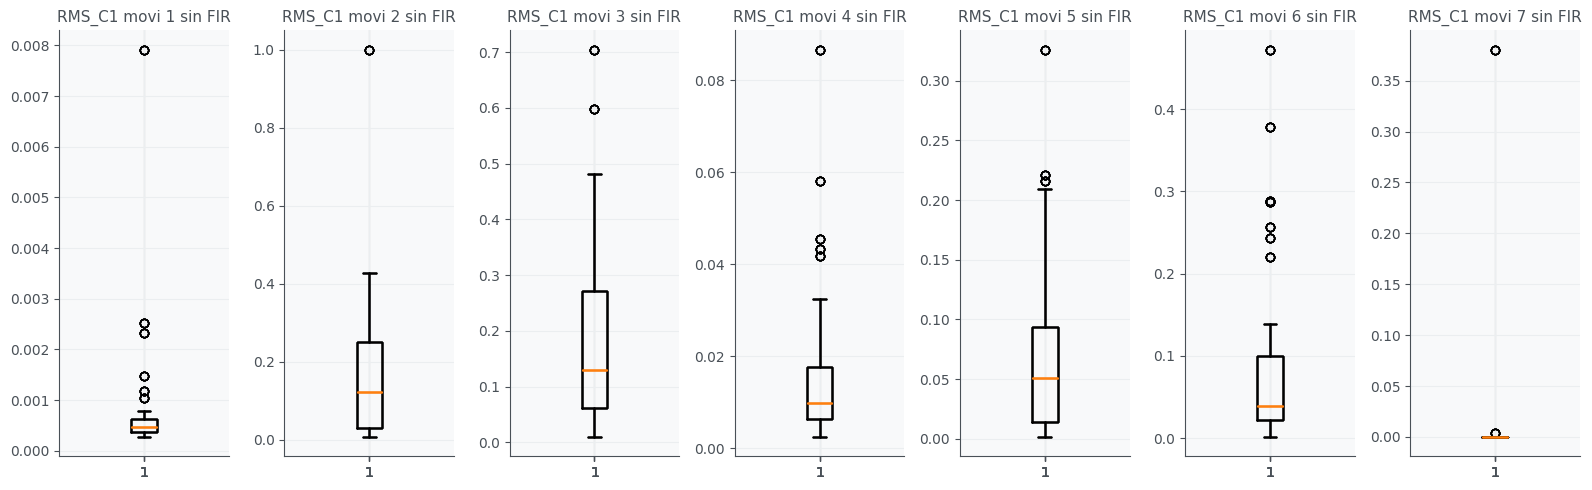

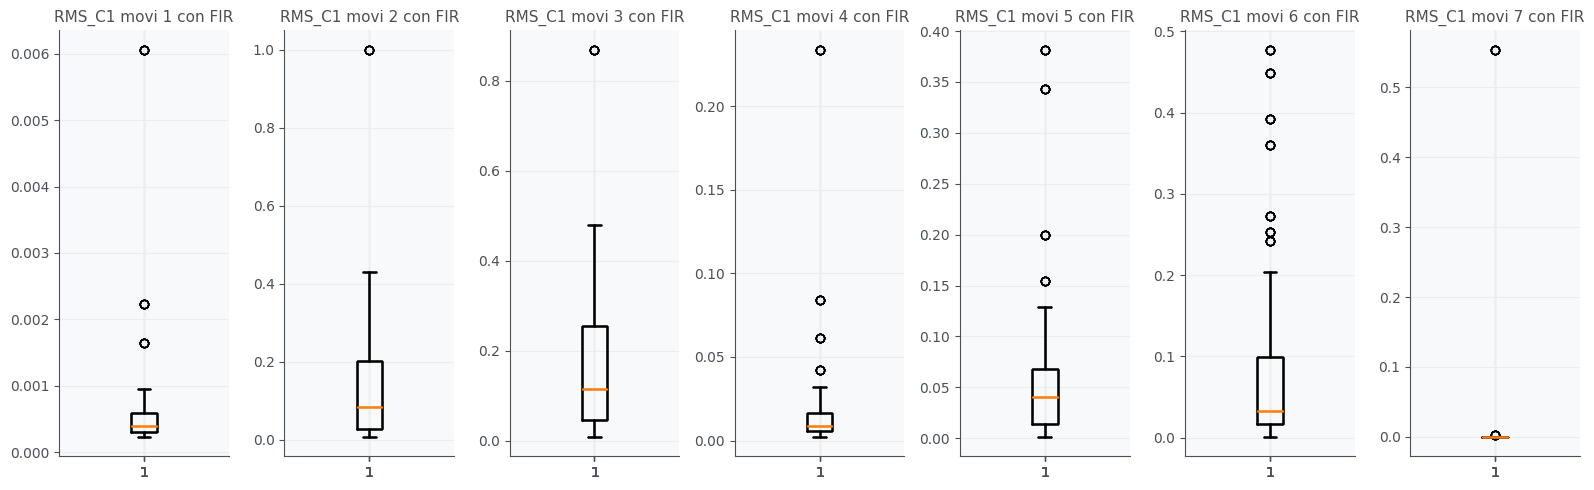

In [230]:
for ii in range(2,9):
    for iii in range(2,9):
        plt.figure(1,figsize=(16,5))
        plt.subplot(1,7,iii-1)
        plt.boxplot(np.asarray(output.loc[output["clase gesto"]==iii-1,columT[2]]))
        plt.title(columT[2] + " movi "+str(iii-1)+ " sin FIR")
        plt.tight_layout()

        plt.figure(2,figsize=(16,5))
        plt.subplot(1,7,iii-1)
        plt.boxplot(np.asarray(output_FIR.loc[output_FIR["clase gesto"]==iii-1,columT[2]]))

        plt.title(columT[2] + " movi "+str(iii-1)+" con FIR")
        plt.tight_layout()

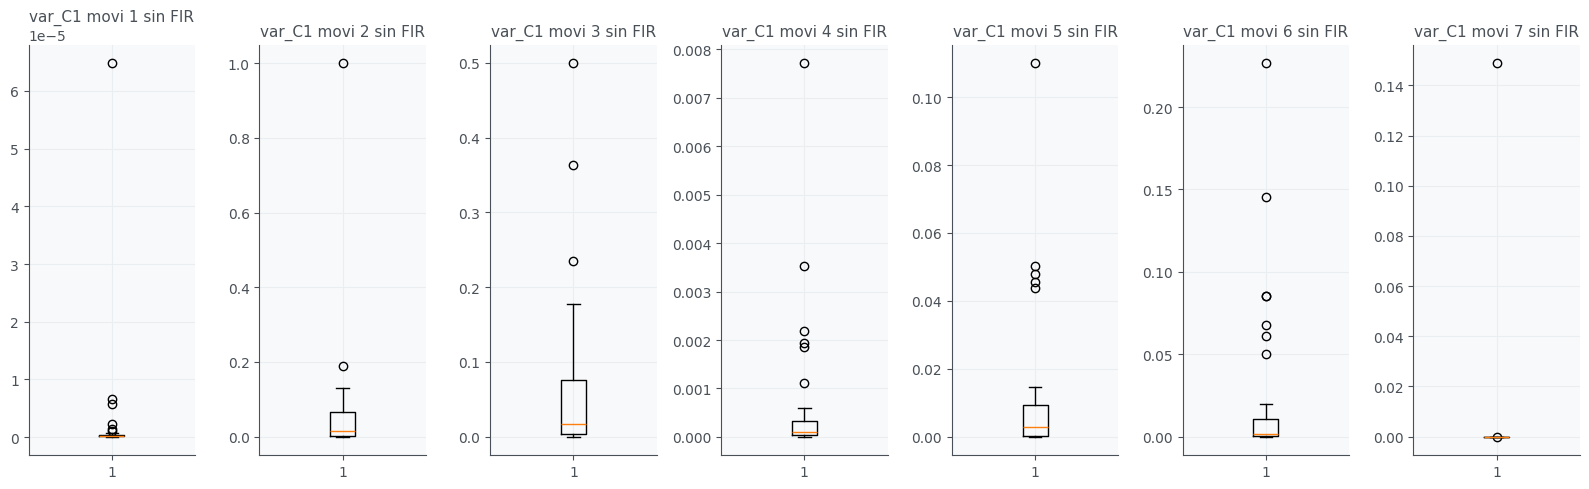

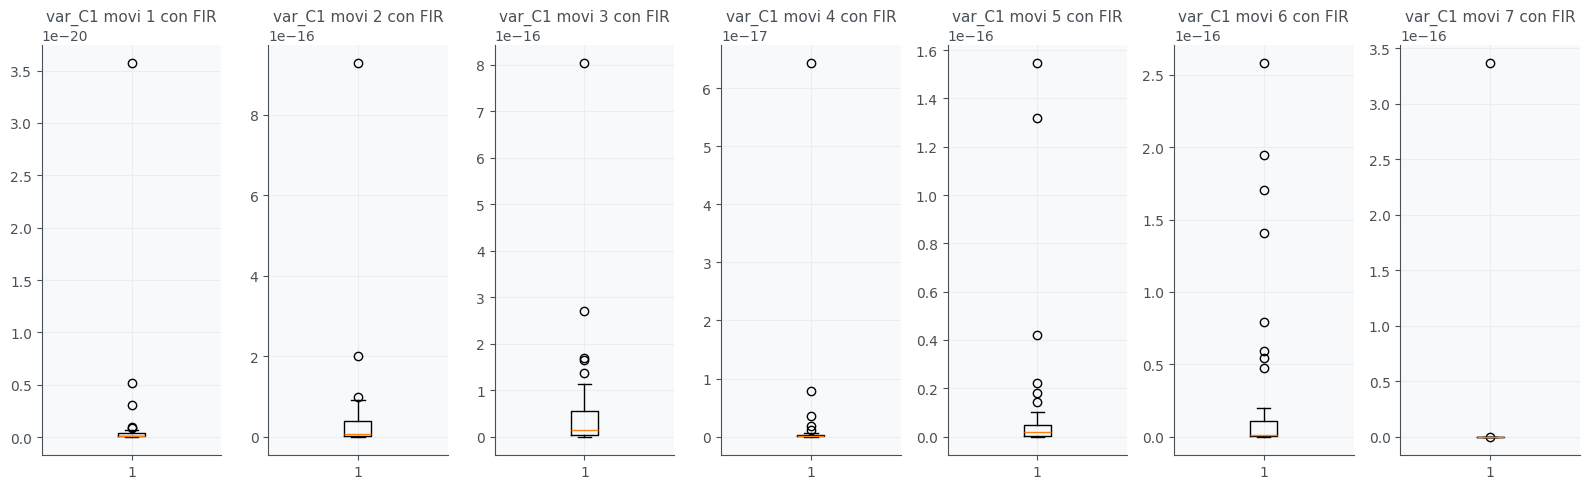

In [231]:
for iii in range(2,9):
    plt.figure(1,figsize=(16,5))
    plt.subplot(1,7,iii-1)
    plt.boxplot(np.asarray(output.loc[output["clase gesto"]==iii-1,columT[3]]))
    
    plt.title(columT[3] + " movi "+str(iii-1)+ " sin FIR")
    plt.tight_layout()

for iii in range(2,9):
    plt.figure(2,figsize=(16,5))
    plt.subplot(1,7,iii-1)
    plt.boxplot(np.asarray(output_FIR.loc[output_FIR["clase gesto"]==iii-1,columT[3]]))
    
    plt.title(columT[3] + " movi "+str(iii-1)+" con FIR")
    plt.tight_layout()

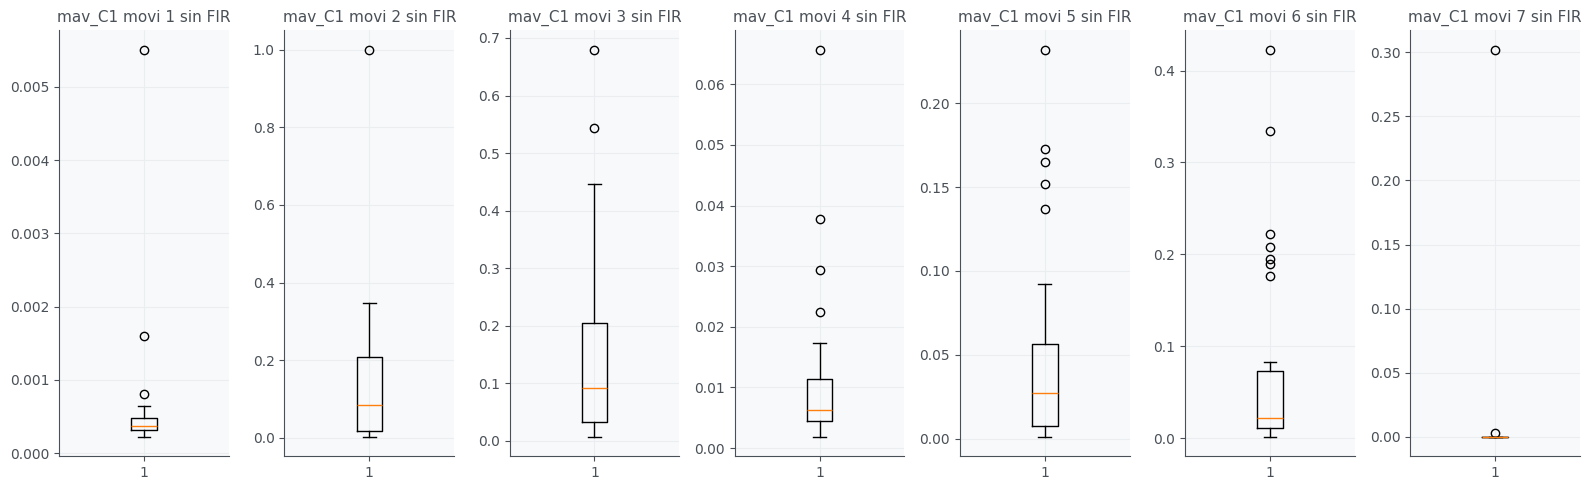

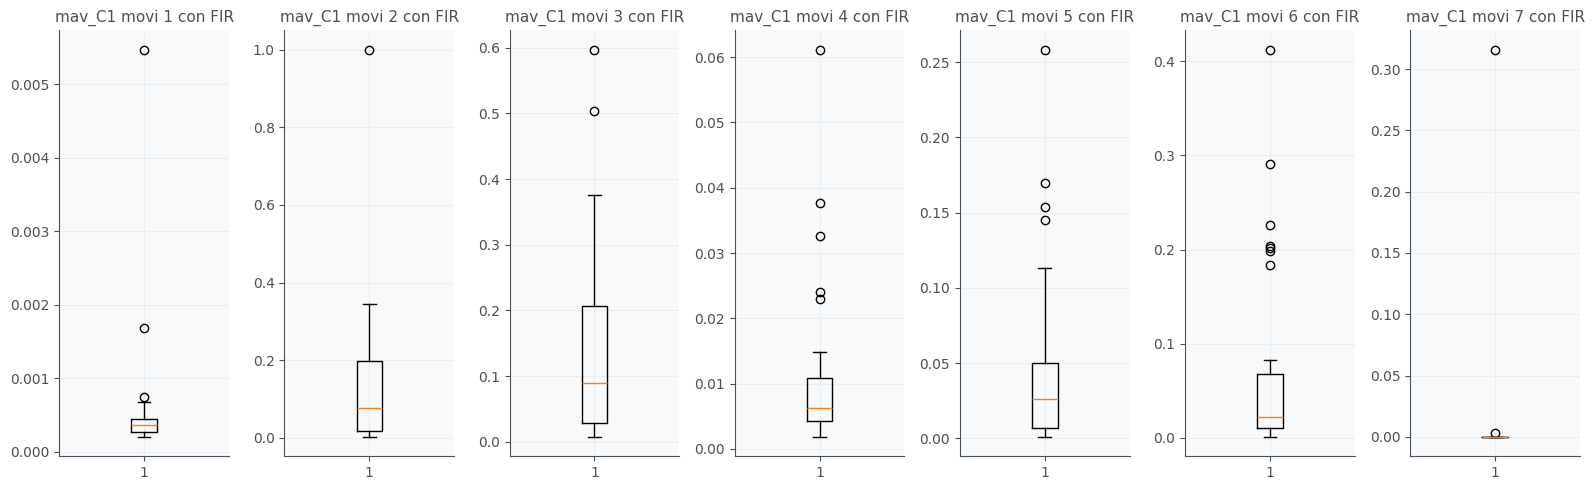

In [232]:
for iii in range(2,9):
    plt.figure(1,figsize=(16,5))
    plt.subplot(1,7,iii-1)
    plt.boxplot(np.asarray(output.loc[output["clase gesto"]==iii-1,columT[4]]))
    
    plt.title(columT[4] + " movi "+str(iii-1)+ " sin FIR")
    plt.tight_layout()

for iii in range(2,9):
    plt.figure(2,figsize=(16,5))
    plt.subplot(1,7,iii-1)
    plt.boxplot(np.asarray(output_FIR.loc[output_FIR["clase gesto"]==iii-1,columT[4]]))
    
    plt.title(columT[4] + " movi "+str(iii-1)+" con FIR")
    plt.tight_layout()

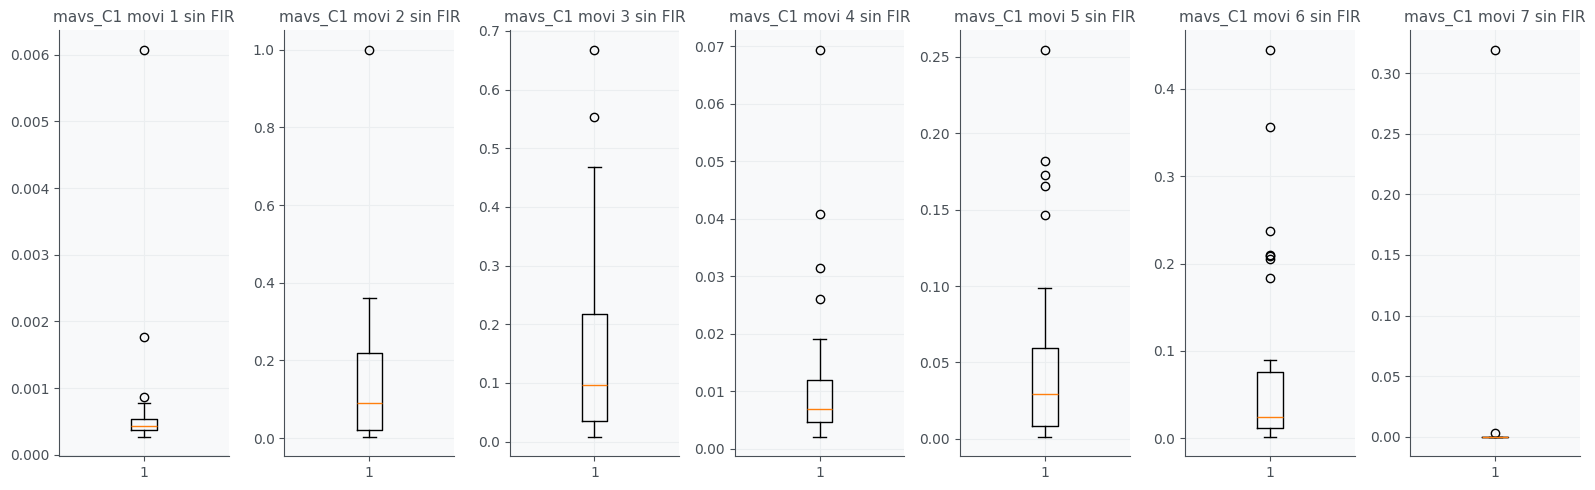

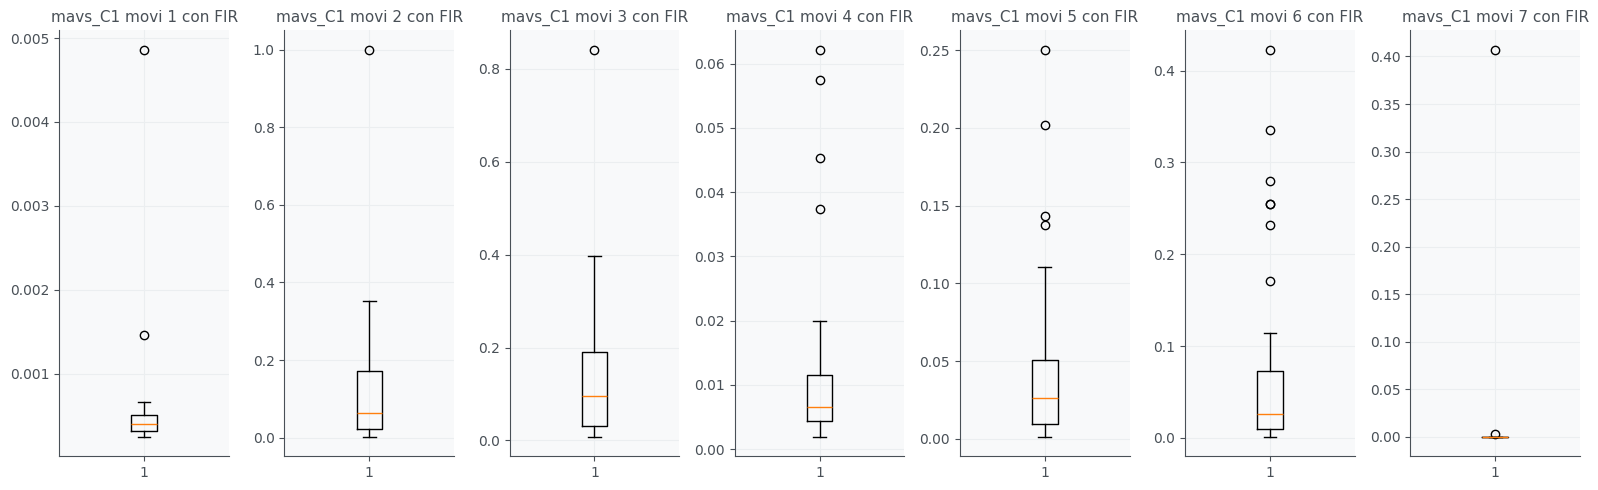

In [233]:
for iii in range(2,9):
    plt.figure(1,figsize=(16,5))
    plt.subplot(1,7,iii-1)
    plt.boxplot(np.asarray(output.loc[output["clase gesto"]==iii-1,columT[5]]))
    
    plt.title(columT[5] + " movi "+str(iii-1)+ " sin FIR")
    plt.tight_layout()

for iii in range(2,9):
    plt.figure(2,figsize=(16,5))
    plt.subplot(1,7,iii-1)
    plt.boxplot(np.asarray(output_FIR.loc[output_FIR["clase gesto"]==iii-1,columT[5]]))
    
    plt.title(columT[5] + " movi "+str(iii-1)+" con FIR")
    plt.tight_layout()

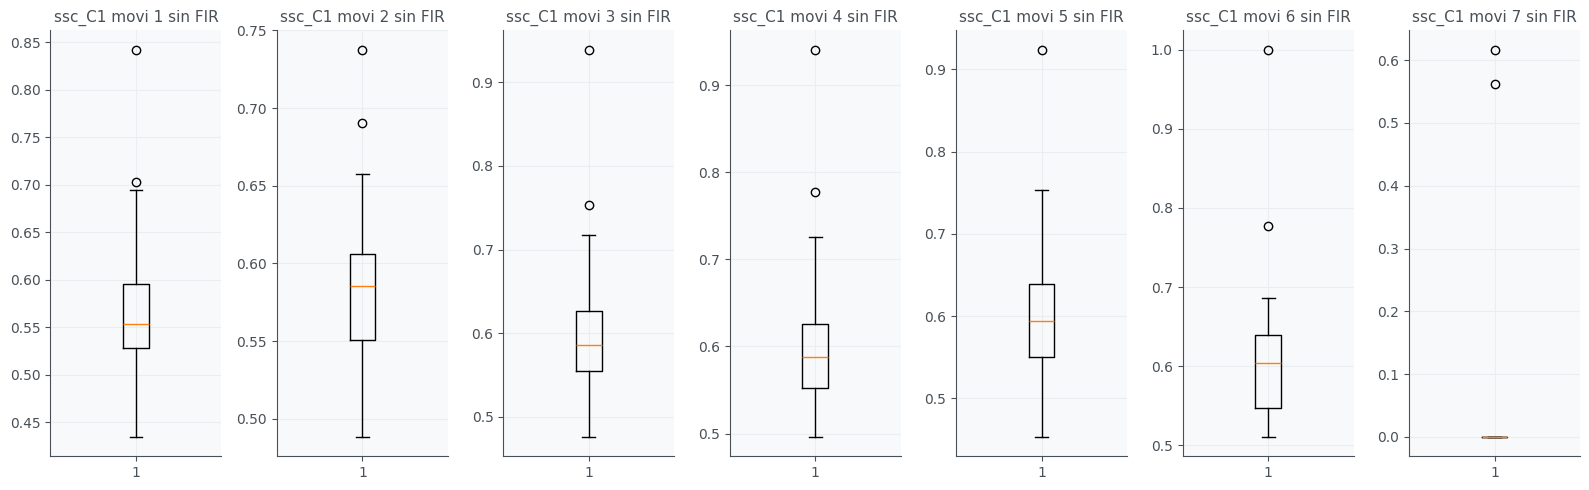

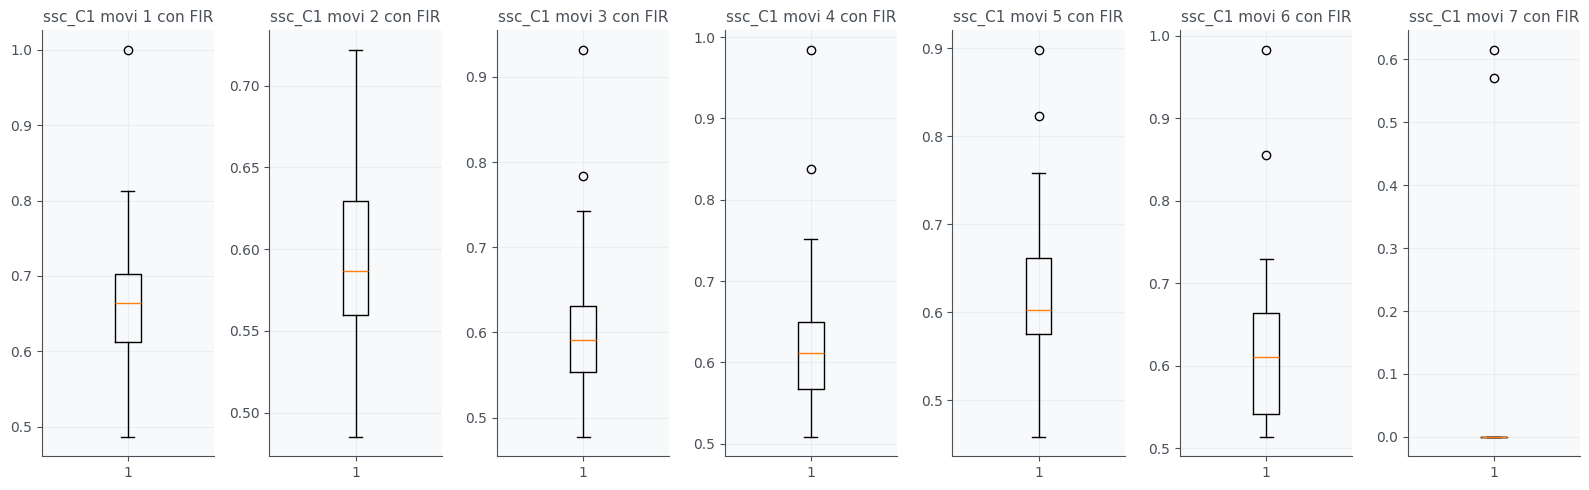

In [234]:
for iii in range(2,9):
    plt.figure(1,figsize=(16,5))
    plt.subplot(1,7,iii-1)
    plt.boxplot(np.asarray(output.loc[output["clase gesto"]==iii-1,columT[6]]))
    
    plt.title(columT[6] + " movi "+str(iii-1)+ " sin FIR")
    plt.tight_layout()

for iii in range(2,9):
    plt.figure(2,figsize=(16,5))
    plt.subplot(1,7,iii-1)
    plt.boxplot(np.asarray(output_FIR.loc[output_FIR["clase gesto"]==iii-1,columT[6]]))
    
    plt.title(columT[6] + " movi "+str(iii-1)+" con FIR")
    plt.tight_layout()

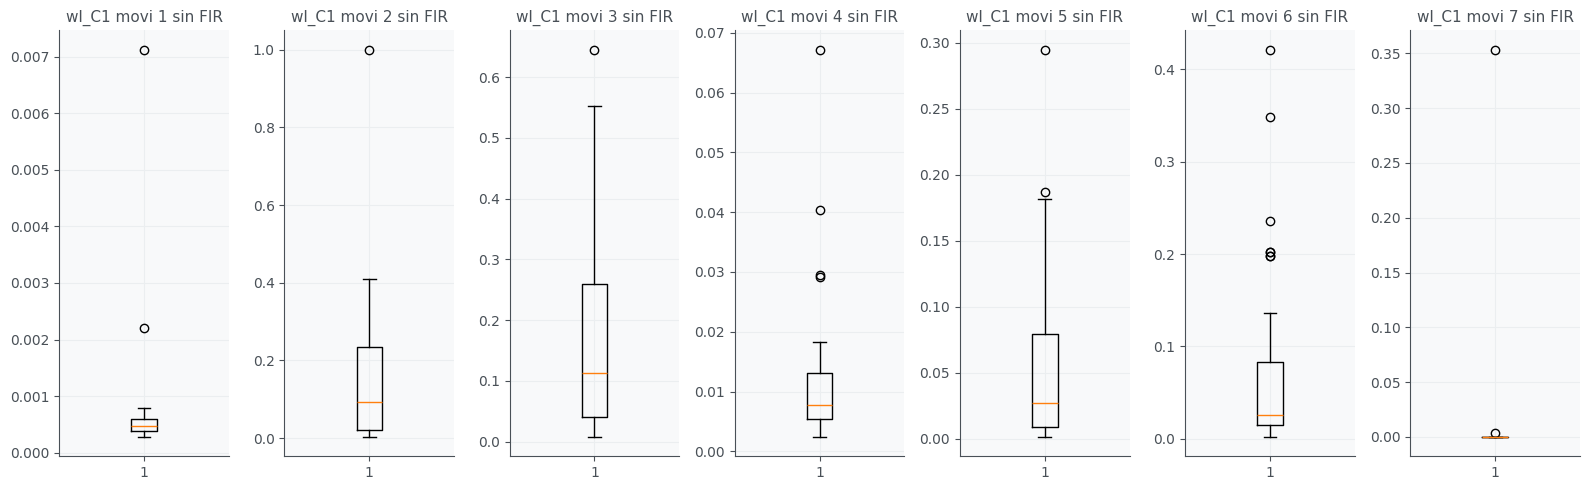

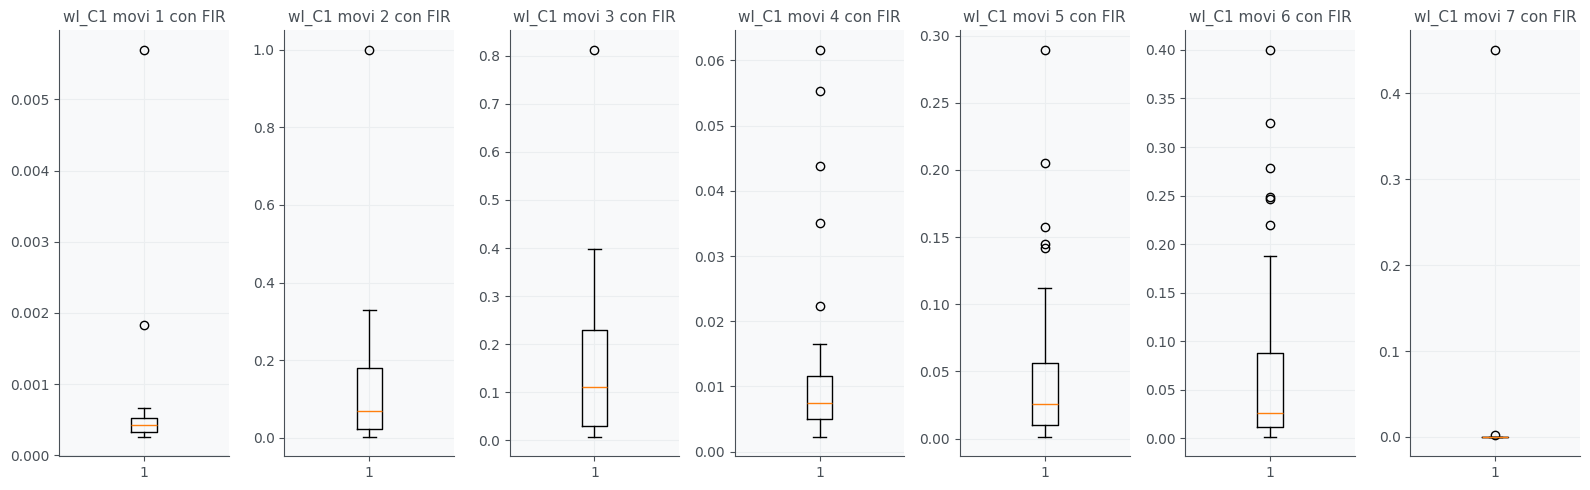

In [235]:
for iii in range(2,9):
    plt.figure(1,figsize=(16,5))
    plt.subplot(1,7,iii-1)
    plt.boxplot(np.asarray(output.loc[output["clase gesto"]==iii-1,columT[7]]))
    
    plt.title(columT[7] + " movi "+str(iii-1)+ " sin FIR")
    plt.tight_layout()

for iii in range(2,9):
    plt.figure(2,figsize=(16,5))
    plt.subplot(1,7,iii-1)
    plt.boxplot(np.asarray(output_FIR.loc[output_FIR["clase gesto"]==iii-1,columT[7]]))
    
    plt.title(columT[7] + " movi "+str(iii-1)+" con FIR")
    plt.tight_layout()

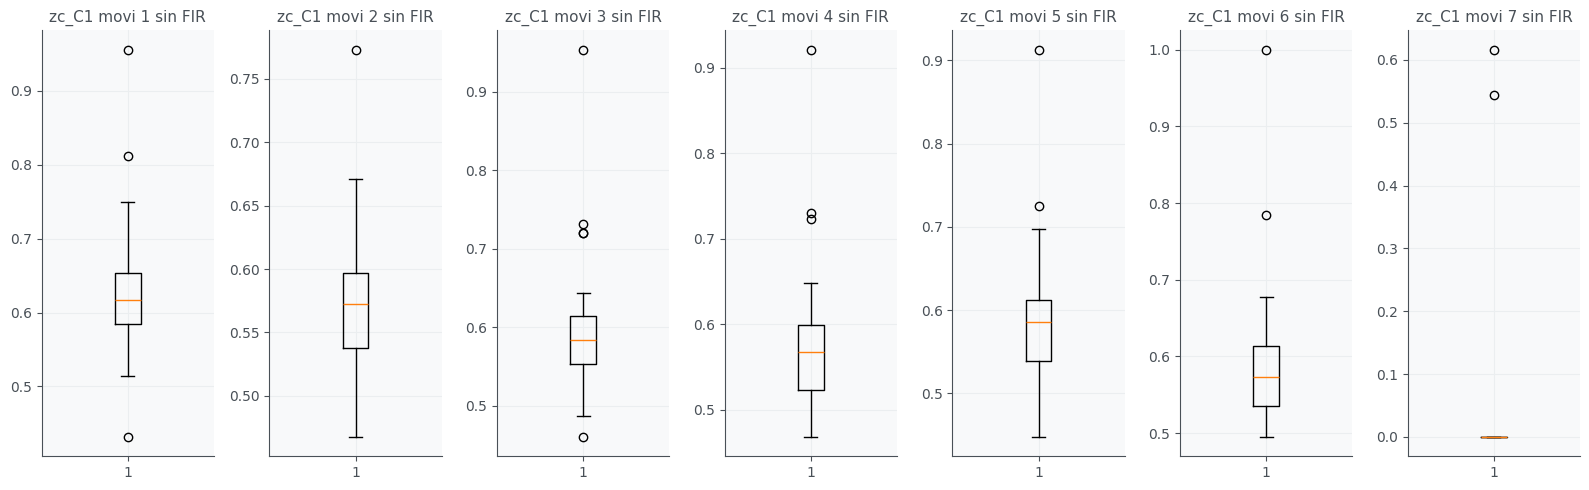

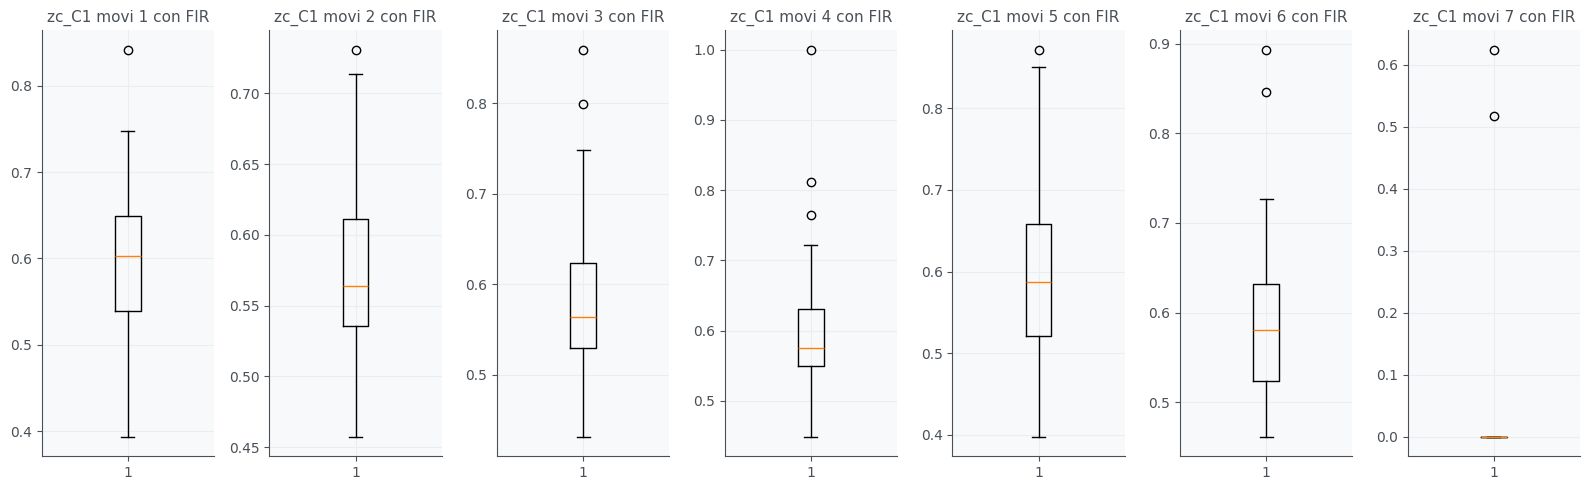

In [236]:
for iii in range(2,9):
    plt.figure(1,figsize=(16,5))
    plt.subplot(1,7,iii-1)
    plt.boxplot(np.asarray(output.loc[output["clase gesto"]==iii-1,columT[8]]))
    
    plt.title(columT[8] + " movi "+str(iii-1)+ " sin FIR")
    plt.tight_layout()

for iii in range(2,9):
    plt.figure(2,figsize=(16,5))
    plt.subplot(1,7,iii-1)
    plt.boxplot(np.asarray(output_FIR.loc[output_FIR["clase gesto"]==iii-1,columT[8]]))
    
    plt.title(columT[8] + " movi "+str(iii-1)+" con FIR")
    plt.tight_layout()

PUNTO d

Con el objetivo de determinar cuál señal (filtrada o sin filtrar) proporciona mejor información para diferenciar entre gestos, se utilizaron boxplots para comparar las métricas de cada señal. Se observó que  las cajas de los boxplots para la señal filtrada muestran menos superposición entre diferentes gestos en comparación con la señal sin filtrar. Esto sugiere que la señal filtrada es potencialmente mas efectiva para la discriminación entre gestos usando Machine Learning. Adicionalmente, se observa una reducción de outliers, sugiriendo una señal más limpia y menos ruidosa.

PUNTO e

In [237]:
# Step 1 - Loading the Required Libraries and Modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics import r2_score
from sklearn.metrics import classification_report,confusion_matrix

In [238]:
output_FIR

,TKEO,clase gesto,RMS_C1,var_C1,mav_C1,mavs_C1,ssc_C1,wl_C1,zc_C1,RMS_C2,...,ssc_C7,wl_C7,zc_C7,RMS_C8,var_C8,mav_C8,mavs_C8,ssc_C8,wl_C8,zc_C8
sujeto1,1,1,0.000394,1.526210e-22,0.000366,0.000407,0.707851,0.000464,0.700855,3.455990e-11,...,571,4.926779e-09,308,9.981598e-12,8.733255e-23,3.937454e-12,8.185256e-13,557,5.983422e-09,350
sujeto2,1,1,0.000433,1.812167e-22,0.000412,0.000432,0.683398,0.000481,0.598291,3.635917e-11,...,545,7.082580e-09,278,1.091257e-11,9.829623e-23,5.043715e-12,9.041879e-13,541,6.454998e-09,304
sujeto3,1,1,0.000501,2.413657e-22,0.000485,0.000501,0.588160,0.000503,0.555556,1.250909e-10,...,491,8.444622e-09,264,2.216730e-11,4.489634e-22,7.284457e-12,1.542700e-12,471,9.938072e-09,262
sujeto4,1,1,0.000381,1.399285e-22,0.000368,0.000417,0.588160,0.000420,0.512821,3.258068e-11,...,473,7.109543e-09,238,2.357372e-11,5.194743e-22,6.644831e-12,1.508780e-12,503,9.761808e-09,266
sujeto5,1,1,0.000247,5.746387e-23,0.000257,0.000275,0.621622,0.000279,0.649573,2.390548e-11,...,493,4.142383e-09,286,7.046723e-12,4.127285e-23,3.394449e-12,6.063424e-13,505,3.944257e-09,304
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
sujeto32,1,7,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,...,0,0.000000e+00,0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0,0.000000e+00,0
sujeto33,1,7,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,...,0,0.000000e+00,0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0,0.000000e+00,0
sujeto34,1,7,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,...,0,0.000000e+00,0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0,0.000000e+00,0
sujeto35,1,7,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,...,0,0.000000e+00,0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0,0.000000e+00,0


In [239]:
target_column = ['clase gesto']
predictors = list(set(list(output_FIR.columns))-set(target_column)-set(["TKEO"]))
print(predictors)
print(len(predictors))

['RMS_C1', 'mav_C2', 'zc_C2', 'zc_C4', 'wl_C5', 'mavs_C6', 'var_C2', 'RMS_C5', 'zc_C8', 'ssc_C5', 'mavs_C3', 'wl_C6', 'zc_C3', 'ssc_C6', 'zc_C5', 'zc_C1', 'mav_C5', 'var_C6', 'mavs_C5', 'ssc_C4', 'mavs_C4', 'mav_C1', 'mav_C7', 'mavs_C7', 'mav_C6', 'RMS_C6', 'RMS_C2', 'var_C8', 'wl_C2', 'mav_C4', 'mav_C3', 'mavs_C2', 'var_C7', 'wl_C1', 'var_C3', 'wl_C4', 'wl_C8', 'var_C1', 'RMS_C3', 'wl_C7', 'ssc_C8', 'var_C4', 'wl_C3', 'mav_C8', 'mavs_C1', 'RMS_C7', 'zc_C6', 'mavs_C8', 'RMS_C4', 'var_C5', 'ssc_C2', 'zc_C7', 'ssc_C1', 'RMS_C8', 'ssc_C7', 'ssc_C3']
56


In [240]:
output_FIR[predictors] = output_FIR[predictors]/output_FIR[predictors].max()
output_FIR

,TKEO,clase gesto,RMS_C1,var_C1,mav_C1,mavs_C1,ssc_C1,wl_C1,zc_C1,RMS_C2,...,ssc_C7,wl_C7,zc_C7,RMS_C8,var_C8,mav_C8,mavs_C8,ssc_C8,wl_C8,zc_C8
sujeto1,1,1,0.000394,1.645033e-07,0.000366,0.000407,0.707851,0.000464,0.700855,0.001946,...,0.734878,0.000338,0.608696,0.000333,9.955089e-08,0.000311,0.000461,0.716860,0.000470,0.738397
sujeto2,1,1,0.000433,1.953253e-07,0.000412,0.000432,0.683398,0.000481,0.598291,0.002048,...,0.701416,0.000486,0.549407,0.000364,1.120485e-07,0.000398,0.000509,0.696268,0.000508,0.641350
sujeto3,1,1,0.000501,2.601572e-07,0.000485,0.000501,0.588160,0.000503,0.555556,0.007045,...,0.631918,0.000579,0.521739,0.000739,5.117760e-07,0.000575,0.000869,0.606178,0.000781,0.552743
sujeto4,1,1,0.000381,1.508226e-07,0.000368,0.000417,0.588160,0.000420,0.512821,0.001835,...,0.608752,0.000488,0.470356,0.000786,5.921518e-07,0.000524,0.000850,0.647362,0.000768,0.561181
sujeto5,1,1,0.000247,6.193770e-08,0.000257,0.000275,0.621622,0.000279,0.649573,0.001346,...,0.634492,0.000284,0.565217,0.000235,4.704717e-08,0.000268,0.000342,0.649936,0.000310,0.641350
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
sujeto32,1,7,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
sujeto33,1,7,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
sujeto34,1,7,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
sujeto35,1,7,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000


In [241]:
#%% Step 4 - Creating the Training and Test Datasets
X = output_FIR[predictors].values
y = output_FIR[target_column].values

#the same seed is used to partition to obtain the same results
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=40)
y_test = np.squeeze(y_test)
y_train = np.squeeze(y_train)
print(X_train.shape)
print(y_train.shape)

print(X_test.shape)
print(y_test.shape)

(176, 56)
(176,)
(76, 56)
(76,)


In [279]:
#Three hidden layer each layer with eigth neurons
mlp = MLPClassifier(hidden_layer_sizes=(56,56,56), activation='relu', solver='adam', max_iter=1000)
print(mlp)

MLPClassifier(hidden_layer_sizes=(56, 56, 56), max_iter=1000)


In [281]:
mlp.fit(X_train,y_train)

predict_train = mlp.predict(X_train)
predict_test = mlp.predict(X_test)

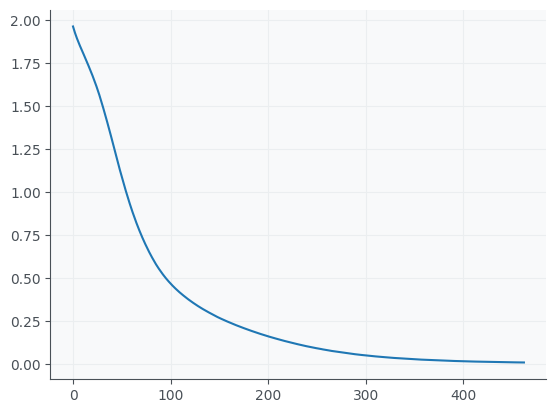

In [282]:
import matplotlib.pyplot as plt

plt.plot(mlp.loss_curve_)
plt.show()

In [244]:
#%% Results
print(confusion_matrix(y_train,predict_train))

[[25  0  0  0  0  0  0]
 [ 0 28  0  0  0  0  0]
 [ 0  0 30  0  0  0  0]
 [ 0  0  0 22  0  0  0]
 [ 0  0  0  0 24  0  0]
 [ 0  0  0  0  0 22  0]
 [ 0  0  0  0  0  0 25]]


In [245]:
print(classification_report(y_train,predict_train,target_names=target_names))

              precision    recall  f1-score   support

        mov1       1.00      1.00      1.00        25
        mov2       1.00      1.00      1.00        28
        mov3       1.00      1.00      1.00        30
        mov4       1.00      1.00      1.00        22
        mov5       1.00      1.00      1.00        24
        mov6       1.00      1.00      1.00        22
        mov7       1.00      1.00      1.00        25

    accuracy                           1.00       176
   macro avg       1.00      1.00      1.00       176
weighted avg       1.00      1.00      1.00       176



In [246]:
print(confusion_matrix(y_test,predict_test))

[[11  0  0  0  0  0  0]
 [ 0  4  1  0  1  2  0]
 [ 0  2  3  0  0  1  0]
 [ 0  0  0 11  3  0  0]
 [ 0  1  0  2  9  0  0]
 [ 0  1  1  0  0 12  0]
 [ 0  0  0  0  0  0 11]]


In [247]:
print(classification_report(y_test,predict_test,target_names=target_names))

              precision    recall  f1-score   support

        mov1       1.00      1.00      1.00        11
        mov2       0.50      0.50      0.50         8
        mov3       0.60      0.50      0.55         6
        mov4       0.85      0.79      0.81        14
        mov5       0.69      0.75      0.72        12
        mov6       0.80      0.86      0.83        14
        mov7       1.00      1.00      1.00        11

    accuracy                           0.80        76
   macro avg       0.78      0.77      0.77        76
weighted avg       0.80      0.80      0.80        76



In [248]:
from itertools import product
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)
    fig=plt.figure()
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [249]:
target_names = ['mov1','mov2','mov3','mov4','mov5','mov6','mov7' ]

Confusion matrix, without normalization
[[25  0  0  0  0  0  0]
 [ 0 28  0  0  0  0  0]
 [ 0  0 30  0  0  0  0]
 [ 0  0  0 22  0  0  0]
 [ 0  0  0  0 24  0  0]
 [ 0  0  0  0  0 22  0]
 [ 0  0  0  0  0  0 25]]


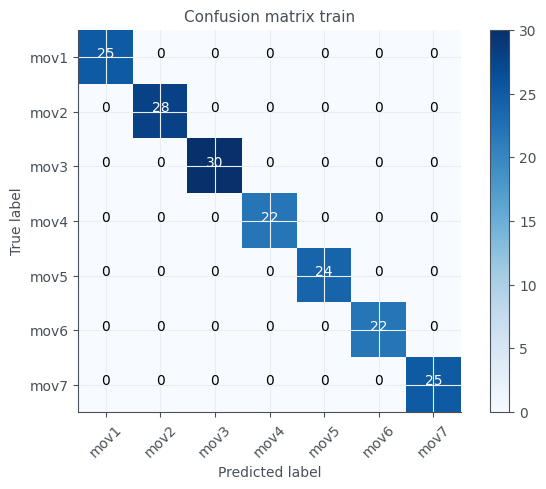

In [250]:
mc_train = confusion_matrix(y_train,predict_train)
plot_confusion_matrix(mc_train, classes=target_names,
                      title='Confusion matrix train')

Confusion matrix, without normalization
[[11  0  0  0  0  0  0]
 [ 0  4  1  0  1  2  0]
 [ 0  2  3  0  0  1  0]
 [ 0  0  0 11  3  0  0]
 [ 0  1  0  2  9  0  0]
 [ 0  1  1  0  0 12  0]
 [ 0  0  0  0  0  0 11]]


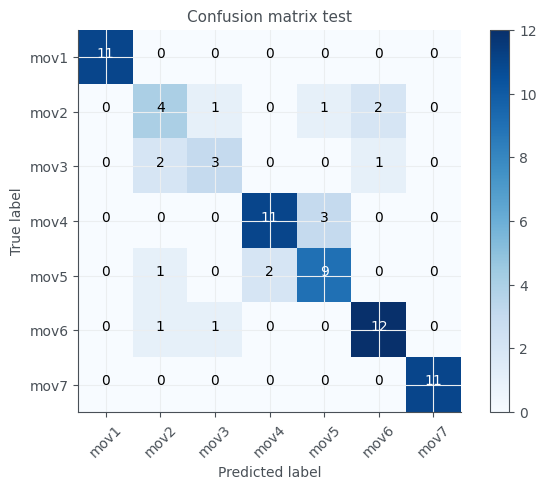

In [251]:
mc_test = confusion_matrix(y_test,predict_test)
plot_confusion_matrix(mc_test, classes=target_names,
                      title='Confusion matrix test')

In [252]:
#Three hidden layer each layer with eigth neurons
mlp2 = MLPClassifier(hidden_layer_sizes=(56,56,56), activation='logistic', solver='adam', max_iter=1000)
print(mlp2)

MLPClassifier(activation='logistic', hidden_layer_sizes=(56, 56, 56),
              max_iter=1000)


In [253]:
mlp2.fit(X_train,y_train)

predict_train = mlp2.predict(X_train)
predict_test = mlp2.predict(X_test)

In [254]:
#%% Results
print(confusion_matrix(y_train,predict_train))

[[ 0  0 25  0  0  0  0]
 [ 0  1 27  0  0  0  0]
 [ 0  0 30  0  0  0  0]
 [ 0  0 22  0  0  0  0]
 [ 0  0 24  0  0  0  0]
 [ 0  0 22  0  0  0  0]
 [ 0  0 25  0  0  0  0]]


In [255]:
print(classification_report(y_train,predict_train,target_names=target_names))

              precision    recall  f1-score   support

        mov1       0.00      0.00      0.00        25
        mov2       1.00      0.04      0.07        28
        mov3       0.17      1.00      0.29        30
        mov4       0.00      0.00      0.00        22
        mov5       0.00      0.00      0.00        24
        mov6       0.00      0.00      0.00        22
        mov7       0.00      0.00      0.00        25

    accuracy                           0.18       176
   macro avg       0.17      0.15      0.05       176
weighted avg       0.19      0.18      0.06       176



c:\Users\compu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\compu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\compu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

In [256]:
print(confusion_matrix(y_test,predict_test))

[[ 0  0 11  0  0  0  0]
 [ 0  0  8  0  0  0  0]
 [ 0  0  6  0  0  0  0]
 [ 0  1 13  0  0  0  0]
 [ 0  0 12  0  0  0  0]
 [ 0  0 14  0  0  0  0]
 [ 0  0 11  0  0  0  0]]


In [257]:
print(classification_report(y_test,predict_test,target_names=target_names))

              precision    recall  f1-score   support

        mov1       0.00      0.00      0.00        11
        mov2       0.00      0.00      0.00         8
        mov3       0.08      1.00      0.15         6
        mov4       0.00      0.00      0.00        14
        mov5       0.00      0.00      0.00        12
        mov6       0.00      0.00      0.00        14
        mov7       0.00      0.00      0.00        11

    accuracy                           0.08        76
   macro avg       0.01      0.14      0.02        76
weighted avg       0.01      0.08      0.01        76



c:\Users\compu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\compu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\compu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

Confusion matrix, without normalization
[[ 0  0 25  0  0  0  0]
 [ 0  1 27  0  0  0  0]
 [ 0  0 30  0  0  0  0]
 [ 0  0 22  0  0  0  0]
 [ 0  0 24  0  0  0  0]
 [ 0  0 22  0  0  0  0]
 [ 0  0 25  0  0  0  0]]


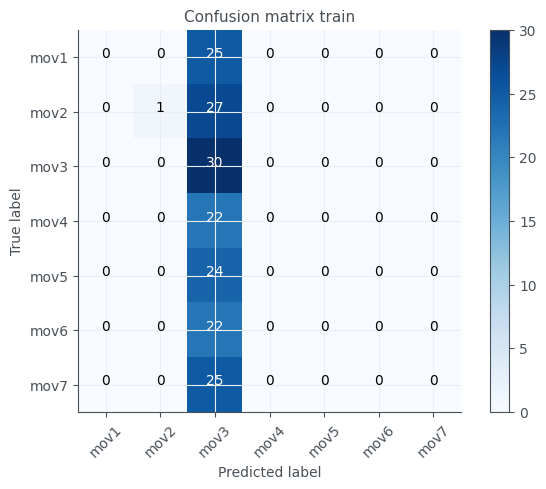

In [258]:
mc_train = confusion_matrix(y_train,predict_train)
plot_confusion_matrix(mc_train, classes=target_names,
                      title='Confusion matrix train')

Confusion matrix, without normalization
[[ 0  0 11  0  0  0  0]
 [ 0  0  8  0  0  0  0]
 [ 0  0  6  0  0  0  0]
 [ 0  1 13  0  0  0  0]
 [ 0  0 12  0  0  0  0]
 [ 0  0 14  0  0  0  0]
 [ 0  0 11  0  0  0  0]]


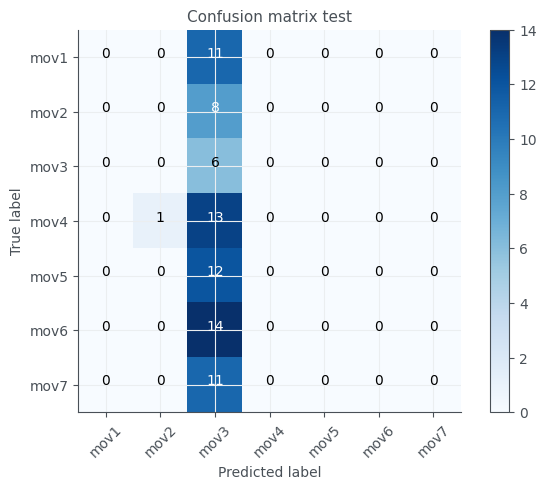

In [259]:
mc_test = confusion_matrix(y_test,predict_test)
plot_confusion_matrix(mc_test, classes=target_names,
                      title='Confusion matrix test')

In [260]:
mlp3 = MLPClassifier(hidden_layer_sizes=(56,56,56,56), activation='relu', solver='adam', max_iter=1000)
print(mlp3)

MLPClassifier(hidden_layer_sizes=(56, 56, 56, 56), max_iter=1000)


In [261]:
mlp3.fit(X_train,y_train)

predict_train = mlp3.predict(X_train)
predict_test = mlp3.predict(X_test)

Confusion matrix, without normalization
[[25  0  0  0  0  0  0]
 [ 0 28  0  0  0  0  0]
 [ 0  0 30  0  0  0  0]
 [ 0  0  0 22  0  0  0]
 [ 0  0  0  0 24  0  0]
 [ 0  0  0  0  0 22  0]
 [ 0  0  0  0  0  0 25]]


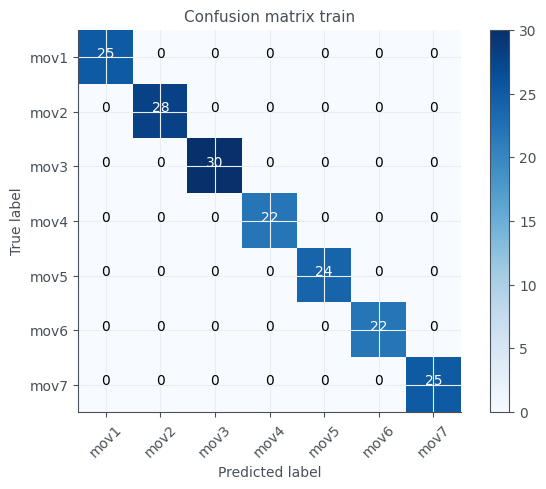

In [262]:
mc_train = confusion_matrix(y_train,predict_train)
plot_confusion_matrix(mc_train, classes=target_names,
                      title='Confusion matrix train')

Confusion matrix, without normalization
[[11  0  0  0  0  0  0]
 [ 0  3  3  0  1  1  0]
 [ 0  2  3  0  0  1  0]
 [ 0  1  0 12  1  0  0]
 [ 0  0  1  2  9  0  0]
 [ 0  1  2  0  0 11  0]
 [ 0  0  0  0  0  0 11]]


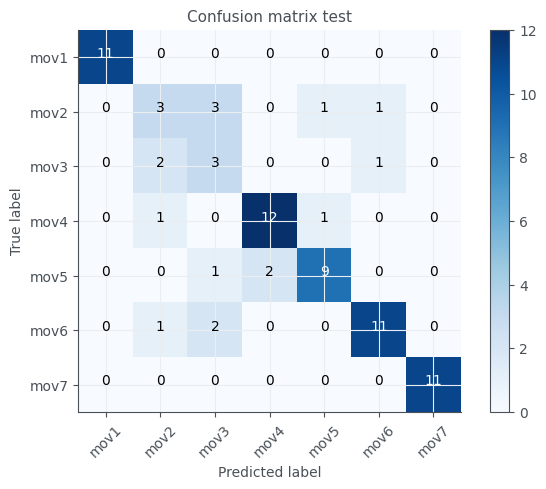

In [263]:
mc_test = confusion_matrix(y_test,predict_test)
plot_confusion_matrix(mc_test, classes=target_names,
                      title='Confusion matrix test')

In [264]:
print(classification_report(y_train,predict_train,target_names=target_names))

              precision    recall  f1-score   support

        mov1       1.00      1.00      1.00        25
        mov2       1.00      1.00      1.00        28
        mov3       1.00      1.00      1.00        30
        mov4       1.00      1.00      1.00        22
        mov5       1.00      1.00      1.00        24
        mov6       1.00      1.00      1.00        22
        mov7       1.00      1.00      1.00        25

    accuracy                           1.00       176
   macro avg       1.00      1.00      1.00       176
weighted avg       1.00      1.00      1.00       176



In [265]:
print(classification_report(y_test,predict_test,target_names=target_names))

              precision    recall  f1-score   support

        mov1       1.00      1.00      1.00        11
        mov2       0.43      0.38      0.40         8
        mov3       0.33      0.50      0.40         6
        mov4       0.86      0.86      0.86        14
        mov5       0.82      0.75      0.78        12
        mov6       0.85      0.79      0.81        14
        mov7       1.00      1.00      1.00        11

    accuracy                           0.79        76
   macro avg       0.75      0.75      0.75        76
weighted avg       0.80      0.79      0.79        76



ANALISIS:
De las tres arquitecturas empleadas, el mejor resultado acorde a las matrices de confusion y metricas tales como el accuracy,fue aquella donde se usaron tres capas internas a la red con un numero de nueronas equivalente al numero de predictores empleados (56), ademas de esto la funcion de activacion aplicada fue relu; Cabe constatar que el hecho de cambiar la funcion de activacion por una sigmoide o logistica, empeoro notablemente el rendimiento del modelo tanto en su evalucion como entrenamiento, ademas, el adicionarle otra capa interna a la red, tambien produjo una leve dismucion en el rendimiento del modelo; Lo anterior nos da a entender que una de las posibles arquitecturas de red mas eficientes para este caso consiste de 3 capas internas con la funcion de activacion relu

In [271]:
from sklearn.model_selection import KFold

kf = KFold(n_splits=16)
fold_runs = 0
final_score = 0
for train, test in kf.split(X):
  mlp = MLPClassifier(hidden_layer_sizes=(56,56,56), activation='relu', solver='adam', max_iter=1000)
  #print("%s %s" % (train, test))
  print(np.ravel(y[train]).shape)
  fold_runs = fold_runs + 1
  mlp.fit(X[train], np.ravel(y[train]))
  outVal = mlp.score(X[test], np.ravel(y[test]))
  #Compute classification error
  final_score = final_score + outVal

#The performance measure reported by k-fold cross-validation is then the average of the values computed in the loop.
print('Score: ' + str(final_score/fold_runs) + ' after ' + str(fold_runs) + ' runs')

(236,)
(236,)
(236,)
(236,)
(236,)
(236,)
(236,)
(236,)
(236,)
(236,)
(236,)
(236,)
(237,)
(237,)
(237,)
(237,)
Score: 0.7869791666666667 after 16 runs


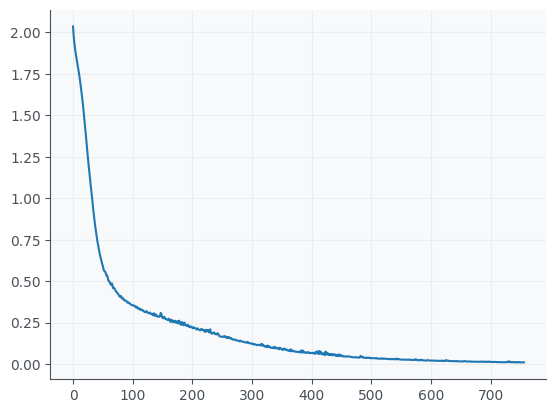

In [272]:
import matplotlib.pyplot as plt

plt.plot(mlp.loss_curve_)
plt.show()

El modelo tiene una precisión del 78% en las particiones de validación. Esto implica que el modelo clasifica correctamente el 78% de los casos en los datos de validación.

PUNTO f

1.SVM

Las maquinas de soporte vectorial buscan encontrar un hiperplano óptimo que separa las diferentes clases en el espacio de características.[1]

Las maquina de soporte vectorial son particularmente útiles cuando las clases están bien separadas en el espacio de características, lo cual puede ser el caso con gestos claramente definidos. Su capacidad para trabajar en espacios de alta dimensión y encontrar márgenes óptimos los hace adecuados para problemas de clasificación donde se necesita precisión[1][2]

In [270]:
from sklearn import svm

clf = svm.NuSVC(gamma='auto')
clf.fit(X_train,y_train)

predict_train = clf.predict(X_train)
predict_test = clf.predict(X_test)

target_names = ['mov1','mov2','mov3','mov4','mov5','mov6','mov7' ]
print(classification_report(y_train,predict_train,target_names=target_names))

print(classification_report(y_test,predict_test,target_names=target_names))

              precision    recall  f1-score   support

        mov1       0.66      1.00      0.79        25
        mov2       0.90      0.68      0.78        28
        mov3       0.66      0.77      0.71        30
        mov4       1.00      0.68      0.81        22
        mov5       0.70      0.79      0.75        24
        mov6       0.82      0.64      0.72        22
        mov7       1.00      0.92      0.96        25

    accuracy                           0.78       176
   macro avg       0.82      0.78      0.79       176
weighted avg       0.82      0.78      0.79       176

              precision    recall  f1-score   support

        mov1       0.65      1.00      0.79        11
        mov2       0.67      0.25      0.36         8
        mov3       0.56      0.83      0.67         6
        mov4       0.90      0.64      0.75        14
        mov5       0.60      0.75      0.67        12
        mov6       0.82      0.64      0.72        14
        mov7       1.00 

2.Arboles de decision

Los árboles de decisión son modelos basados en reglas que se construyen a partir de decisiones binarias en cada nodo del árbol.

Los árboles de decisión son útiles para entender y visualizar las reglas de clasificación. En el contexto de clasificación de gestos, pueden ayudar a identificar qué características (RMS, varianza) son más importantes para diferenciar entre gestos específicos. Además, son rápidos de entrenar y pueden manejar tanto datos categóricos como numéricos [3]

In [283]:
from sklearn.tree import DecisionTreeClassifier

# Entrenar el modelo
tree_model = DecisionTreeClassifier()
tree_model.fit(X_train, y_train)

# Evaluar el modelo
y_pred_tree = tree_model.predict(X_test)
print("Árbol de Decisión - Reporte de Clasificación:")
print(classification_report(y_test, y_pred_tree))
print("Árbol de Decisión - Matriz de Confusión:")
print(confusion_matrix(y_test, y_pred_tree))

Árbol de Decisión - Reporte de Clasificación:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        11
           2       0.33      0.25      0.29         8
           3       0.25      0.33      0.29         6
           4       0.62      0.71      0.67        14
           5       0.62      0.42      0.50        12
           6       0.64      0.50      0.56        14
           7       0.69      1.00      0.81        11

    accuracy                           0.63        76
   macro avg       0.59      0.60      0.59        76
weighted avg       0.63      0.63      0.62        76

Árbol de Decisión - Matriz de Confusión:
[[11  0  0  0  0  0  0]
 [ 0  2  2  1  0  1  2]
 [ 0  1  2  0  1  2  0]
 [ 0  1  0 10  2  1  0]
 [ 0  1  2  3  5  0  1]
 [ 0  1  2  2  0  7  2]
 [ 0  0  0  0  0  0 11]]


Acorde a los resultados de los tres modelos empleados, se observa acorde a la metrica del accuracy, que el que mejor rendimiento del modelo a la hora de clasificar los movimintos fue la red neuronal con una presicion del 78% en promedio, luego le sigue el SVM, con un 74% de presicion y finalmente el arbol de decision con una del 59%, todos los resultados anteriores son resultados de test 

PUNTO g

Considerando los microcontroladores comercialmente disponibles a nivel nacional y teniendo en cuenta capacidades de memoria, velocidad de procesamiento, costo
el ESP32 tiene una gran cantidad de memoria flash y SRAM, así como una velocidad de procesamiento muy alta en comparación con los Arduinos tradicionales
lo que lo hace más adecuado para implementar redes neuronales Respecto a lo árboles de Decisión y SVM se pueden implementar modelos más complejos con ESP32, ya que tiene más potencia de procesamiento y memoria que los Arduinos. 

Posibles Tiempos de Adquisición y Clasificación:

Los tiempos de adquisición dependen del sensor específico utilizado y de la frecuencia de muestreo requerida. En este caso, considerando que se usó una frecuencia de muestreo de 1000 Hz, el tiempo requerido seria de varios milisegundos

Los tiempos de clasificación para redes neuronales en ESP32 pueden variar según la complejidad del modelo y el tamaño de entrada. Para modelos pequeños a medianos, los tiempos de clasificación podrían estar en el rango de milisegundos a decenas de milisegundos.
Modelos como árboles de Decisión y SVM tienden a tener tiempos de clasificación más rápidos que las redes neuronales. Para árboles de decisión y SVM simples, los tiempos de clasificación podrían ser del orden de microsegundos a milisegundos

BIBLIOGRAFIA:

[1]	C. Cortes y V. Vapnik, Mach. Learn., vol. 20, núm. 3, pp. 273–297, 1995.

[2]	Researchgate.net. [En línea]. Disponible en: https://www.researchgate.net/publication/203918300_Smola_A_Learning_with_Kernels_-_Support_Vector_Machines_Regularization_Optimization_and_Beyond_MIT_Press_Cambridge_MA. [Consultado: 31-may-2024].

[3]	J. R. Quinlan, “Induction of decision trees”, Mach. Learn., vol. 1, núm. 1, pp. 81–106, 1986.